# Awesome Computer Vision CV Resources and Basic Fashion MNIST Classification

    This Kernel has the basic Fashion MNIST Classification and the curated lists of collection of awesome computer vision resources and deep learning resources for computer vision with two different parts as follows

> #### **Credits**: Thanks to **TensorFlow Team** for Fashion MNIST Classification using tf.keras, **Jiwon Kim** and **Jia-Bin Huang** and other contributers for such wonderful curated collections!

### Here are some of *my kernel notebooks* for **Machine Learning and Data Science** as follows, ***Upvote*** them if you *like* them

> * [Awesome Deep Learning Basics and Resources](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-resources)
> * [Data Science with R - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-r-awesome-tutorials)
> * [Data Science and Machine Learning Cheetcheets](https://www.kaggle.com/arunkumarramanan/data-science-and-machine-learning-cheatsheets)
> * [Awesome ML Frameworks and MNIST Classification](https://www.kaggle.com/arunkumarramanan/awesome-machine-learning-ml-frameworks)
> * [Awesome Data Science for Beginners with Titanic Exploration](https://kaggle.com/arunkumarramanan/awesome-data-science-for-beginners)
> * [Tensorflow Tutorial and House Price Prediction](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-examples)
> * [Practical Machine Learning with PyTorch](https://www.kaggle.com/arunkumarramanan/practical-machine-learning-with-pytorch)
> * [Data Science with Python - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-python-awesome-tutorials)
> * [Machine Learning and Deep Learning - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-ml-tutorials)
> * [Machine Learning Engineer's Toolkit with Roadmap](https://www.kaggle.com/arunkumarramanan/machine-learning-engineer-s-toolkit-with-roadmap) 
> * [Awesome TensorFlow and PyTorch Resources](https://www.kaggle.com/arunkumarramanan/awesome-tensorflow-and-pytorch-resources)
> * [Hands-on ML with scikit-learn and TensorFlow](https://www.kaggle.com/arunkumarramanan/hands-on-ml-with-scikit-learn-and-tensorflow)
> * [Awesome Data Science IPython Notebooks](https://www.kaggle.com/arunkumarramanan/awesome-data-science-ipython-notebooks)
> * [Data Scientist's Toolkits - Awesome Data Science Resources](https://www.kaggle.com/arunkumarramanan/data-scientist-s-toolkits-awesome-ds-resources)
> * [Awesome Computer Vision Resources (TBU)](https://www.kaggle.com/arunkumarramanan/awesome-computer-vision-resources-to-be-updated)


# Basic Fashion MNIST Classification from TensorFlow Docs
## A look at neural network: basic classification using tf.keras

This notebook trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details, this is a fast-paced overview of a complete TensorFlow program with the details explained as we go.

This notebook uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code. 

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

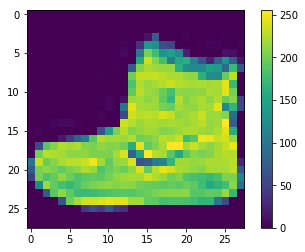

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

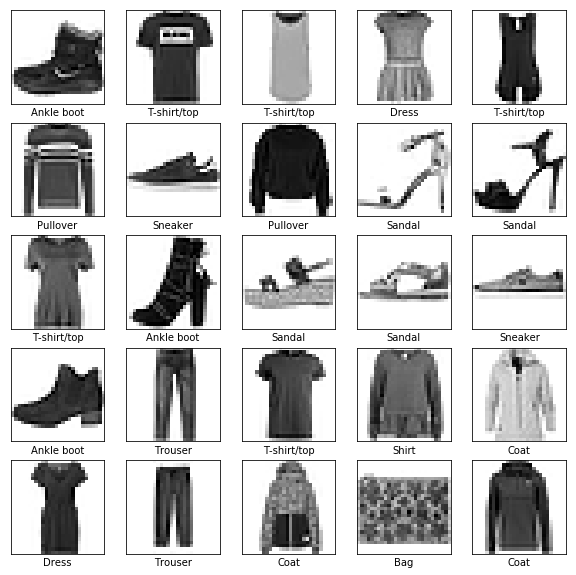

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.5016 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3687 - acc: 0.8671
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3344 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3107 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2914 - acc: 0.8928


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.8786


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [16]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [17]:
predictions[0]

array([2.7097163e-05, 1.0450791e-09, 5.2412897e-08, 6.8056963e-08,
       1.8665391e-07, 1.2862514e-02, 2.0404127e-06, 1.8392621e-02,
       2.2097242e-06, 9.6871322e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [18]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

In [19]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

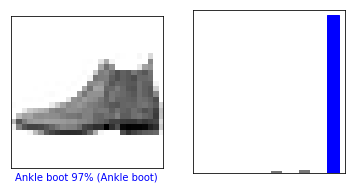

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

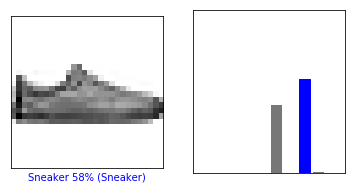

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

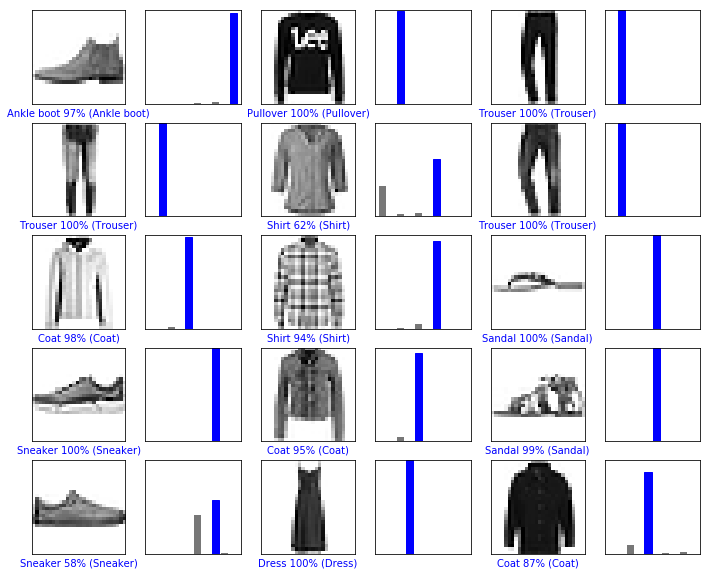

In [23]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image. 

In [24]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [25]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the image:

In [26]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.7097165e-05 1.0450792e-09 5.2412805e-08 6.8056714e-08 1.8665358e-07
  1.2862491e-02 2.0404129e-06 1.8392593e-02 2.2097161e-06 9.6871334e-01]]


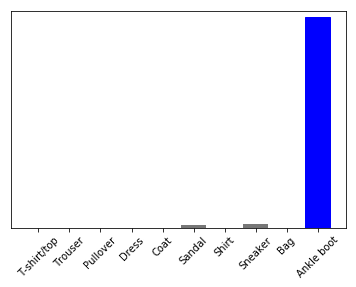

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [28]:
np.argmax(predictions_single[0])

9

And, as before, the model predicts a label of 9.

## License

In [29]:
##### Copyright 2018 The TensorFlow Authors.

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [30]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Awesome Computer Vision CV Resources


  ## Awesome Computer Vision CV with Deep Learning - Part I

    The part 1 has a curated list of deep learning resources for computer vision as follows,

## Table of Contents -  Part I

- [Papers](#papers)
  - [ImageNet Classification](#imagenet-classification)
  - [Object Detection](#object-detection)
  - [Object Tracking](#object-tracking)
  - [Low-Level Vision](#low-level-vision)
    - [Super-Resolution](#super-resolution)
    - [Other Applications](#other-applications)
  - [Edge Detection](#edge-detection)
  - [Semantic Segmentation](#semantic-segmentation)
  - [Visual Attention and Saliency](#visual-attention-and-saliency)
  - [Object Recognition](#object-recognition)
  - [Human Pose Estimation](#human-pose-estimation)
  - [Understanding CNN](#understanding-cnn)
  - [Image and Language](#image-and-language)
    - [Image Captioning](#image-captioning)
    - [Video Captioning](#video-captioning)
    - [Question Answering](#question-answering)
  - [Image Generation](#image-generation)
  - [Other Topics](#other-topics)
- [Courses](#courses)
- [Books](#books)
- [Videos](#videos)
- [Software](#software)
  - [Framework](#framework)
  - [Applications](#applications)
- [Tutorials](#tutorials)
- [Blogs](#blogs)


## Papers

### ImageNet Classification
![classification](https://cloud.githubusercontent.com/assets/5226447/8451949/327b9566-2022-11e5-8b34-53b4a64c13ad.PNG)
(from Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, ImageNet Classification with Deep Convolutional Neural Networks, NIPS, 2012.)
* Microsoft (Deep Residual Learning) [[Paper](http://arxiv.org/pdf/1512.03385v1.pdf)][[Slide](http://image-net.org/challenges/talks/ilsvrc2015_deep_residual_learning_kaiminghe.pdf)]
  * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, Deep Residual Learning for Image Recognition, arXiv:1512.03385.
* Microsoft (PReLu/Weight Initialization) [[Paper]](http://arxiv.org/pdf/1502.01852)
  * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification, arXiv:1502.01852.
* Batch Normalization [[Paper]](http://arxiv.org/pdf/1502.03167)
  * Sergey Ioffe, Christian Szegedy, Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift, arXiv:1502.03167.
* GoogLeNet [[Paper]](http://arxiv.org/pdf/1409.4842)
  * Christian Szegedy, Wei Liu, Yangqing Jia, Pierre Sermanet, Scott Reed, Dragomir Anguelov, Dumitru Erhan, Vincent Vanhoucke, Andrew Rabinovich, CVPR, 2015.
* VGG-Net [[Web]](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) [[Paper]](http://arxiv.org/pdf/1409.1556)
  * Karen Simonyan and Andrew Zisserman, Very Deep Convolutional Networks for Large-Scale Visual Recognition, ICLR, 2015.
* AlexNet [[Paper]](http://papers.nips.cc/book/advances-in-neural-information-processing-systems-25-2012)
  * Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, ImageNet Classification with Deep Convolutional Neural Networks, NIPS, 2012.

### Object Detection
![object_detection](https://cloud.githubusercontent.com/assets/5226447/8452063/f76ba500-2022-11e5-8db1-2cd5d490e3b3.PNG)
(from Shaoqing Ren, Kaiming He, Ross Girshick, Jian Sun, Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks, arXiv:1506.01497.)

* PVANET [[Paper]](https://arxiv.org/pdf/1608.08021) [[Code]](https://github.com/sanghoon/pva-faster-rcnn)
  * Kye-Hyeon Kim, Sanghoon Hong, Byungseok Roh, Yeongjae Cheon, Minje Park, PVANET: Deep but Lightweight Neural Networks for Real-time Object Detection, arXiv:1608.08021
* OverFeat, NYU [[Paper]](http://arxiv.org/pdf/1312.6229.pdf)
  * OverFeat: Integrated Recognition, Localization and Detection using Convolutional Networks, ICLR, 2014.
* R-CNN, UC Berkeley [[Paper-CVPR14]](http://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Girshick_Rich_Feature_Hierarchies_2014_CVPR_paper.pdf) [[Paper-arXiv14]](http://arxiv.org/pdf/1311.2524)
  * Ross Girshick, Jeff Donahue, Trevor Darrell, Jitendra Malik, Rich feature hierarchies for accurate object detection and semantic segmentation, CVPR, 2014.
* SPP, Microsoft Research [[Paper]](http://arxiv.org/pdf/1406.4729)
  * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition, ECCV, 2014.
* Fast R-CNN, Microsoft Research [[Paper]](http://arxiv.org/pdf/1504.08083)
  * Ross Girshick, Fast R-CNN, arXiv:1504.08083.
* Faster R-CNN, Microsoft Research [[Paper]](http://arxiv.org/pdf/1506.01497)
  * Shaoqing Ren, Kaiming He, Ross Girshick, Jian Sun, Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks, arXiv:1506.01497.
* R-CNN minus R, Oxford [[Paper]](http://arxiv.org/pdf/1506.06981)
  * Karel Lenc, Andrea Vedaldi, R-CNN minus R, arXiv:1506.06981.
* End-to-end people detection in crowded scenes [[Paper]](http://arxiv.org/abs/1506.04878)
  * Russell Stewart, Mykhaylo Andriluka, End-to-end people detection in crowded scenes, arXiv:1506.04878.
* You Only Look Once: Unified, Real-Time Object Detection [[Paper]](http://arxiv.org/abs/1506.02640), [[Paper Version 2]](https://arxiv.org/abs/1612.08242), [[C Code]](https://github.com/pjreddie/darknet), [[Tensorflow Code]](https://github.com/thtrieu/darkflow)
  * Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi, You Only Look Once: Unified, Real-Time Object Detection, arXiv:1506.02640
  * Joseph Redmon, Ali Farhadi (Version 2)
* Inside-Outside Net [[Paper]](http://arxiv.org/abs/1512.04143)
  * Sean Bell, C. Lawrence Zitnick, Kavita Bala, Ross Girshick, Inside-Outside Net: Detecting Objects in Context with Skip Pooling and Recurrent Neural Networks
* Deep Residual Network (Current State-of-the-Art) [[Paper]](http://arxiv.org/abs/1512.03385)
  * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, Deep Residual Learning for Image Recognition
* Weakly Supervised Object Localization with Multi-fold Multiple Instance Learning [[Paper](http://arxiv.org/pdf/1503.00949.pdf)]
* R-FCN [[Paper]](https://arxiv.org/abs/1605.06409) [[Code]](https://github.com/daijifeng001/R-FCN)
  * Jifeng Dai, Yi Li, Kaiming He, Jian Sun, R-FCN: Object Detection via Region-based Fully Convolutional Networks
* SSD [[Paper]](https://arxiv.org/pdf/1512.02325v2.pdf) [[Code]](https://github.com/weiliu89/caffe/tree/ssd)
  * Wei Liu1, Dragomir Anguelov, Dumitru Erhan, Christian Szegedy, Scott Reed, Cheng-Yang Fu, Alexander C. Berg, SSD: Single Shot MultiBox Detector, arXiv:1512.02325
* Speed/accuracy trade-offs for modern convolutional object detectors [[Paper]](https://arxiv.org/pdf/1611.10012v1.pdf)
  * Jonathan Huang, Vivek Rathod, Chen Sun, Menglong Zhu, Anoop Korattikara, Alireza Fathi, Ian Fischer, Zbigniew Wojna, Yang Song, Sergio Guadarrama, Kevin Murphy, Google Research, arXiv:1611.10012

### Video Classification
* Nicolas Ballas, Li Yao, Pal Chris, Aaron Courville, "Delving Deeper into Convolutional Networks for Learning Video Representations", ICLR 2016. [[Paper](http://arxiv.org/pdf/1511.06432v4.pdf)]
* Michael Mathieu, camille couprie, Yann Lecun, "Deep Multi Scale Video Prediction Beyond Mean Square Error", ICLR 2016. [[Paper](http://arxiv.org/pdf/1511.05440v6.pdf)]

### Object Tracking
* Seunghoon Hong, Tackgeun You, Suha Kwak, Bohyung Han, Online Tracking by Learning Discriminative Saliency Map with Convolutional Neural Network, arXiv:1502.06796. [[Paper]](http://arxiv.org/pdf/1502.06796)
* Hanxi Li, Yi Li and Fatih Porikli, DeepTrack: Learning Discriminative Feature Representations by Convolutional Neural Networks for Visual Tracking, BMVC, 2014. [[Paper]](http://www.bmva.org/bmvc/2014/files/paper028.pdf)
* N Wang, DY Yeung, Learning a Deep Compact Image Representation for Visual Tracking, NIPS, 2013. [[Paper]](http://winsty.net/papers/dlt.pdf)
* Chao Ma, Jia-Bin Huang, Xiaokang Yang and Ming-Hsuan Yang, Hierarchical Convolutional Features for Visual Tracking, ICCV 2015 [[Paper](http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Ma_Hierarchical_Convolutional_Features_ICCV_2015_paper.pdf)] [[Code](https://github.com/jbhuang0604/CF2)]
* Lijun Wang, Wanli Ouyang, Xiaogang Wang, and Huchuan Lu, Visual Tracking with fully Convolutional Networks, ICCV 2015  [[Paper](http://202.118.75.4/lu/Paper/ICCV2015/iccv15_lijun.pdf)] [[Code](https://github.com/scott89/FCNT)]
* Hyeonseob Namand Bohyung Han, Learning Multi-Domain Convolutional Neural Networks for Visual Tracking, [[Paper](http://arxiv.org/pdf/1510.07945.pdf)] [[Code](https://github.com/HyeonseobNam/MDNet)] [[Project Page](http://cvlab.postech.ac.kr/research/mdnet/)]

### Low-Level Vision

#### Super-Resolution
* Iterative Image Reconstruction
  * Sven Behnke: Learning Iterative Image Reconstruction. IJCAI, 2001. [[Paper]](http://www.ais.uni-bonn.de/behnke/papers/ijcai01.pdf)
  * Sven Behnke: Learning Iterative Image Reconstruction in the Neural Abstraction Pyramid. International Journal of Computational Intelligence and Applications, vol. 1, no. 4, pp. 427-438, 2001. [[Paper]](http://www.ais.uni-bonn.de/behnke/papers/ijcia01.pdf)
* Super-Resolution (SRCNN) [[Web]](http://mmlab.ie.cuhk.edu.hk/projects/SRCNN.html) [[Paper-ECCV14]](http://personal.ie.cuhk.edu.hk/~ccloy/files/eccv_2014_deepresolution.pdf) [[Paper-arXiv15]](http://arxiv.org/pdf/1501.00092.pdf)
  * Chao Dong, Chen Change Loy, Kaiming He, Xiaoou Tang, Learning a Deep Convolutional Network for Image Super-Resolution, ECCV, 2014.
  * Chao Dong, Chen Change Loy, Kaiming He, Xiaoou Tang, Image Super-Resolution Using Deep Convolutional Networks, arXiv:1501.00092.
* Very Deep Super-Resolution
  * Jiwon Kim, Jung Kwon Lee, Kyoung Mu Lee, Accurate Image Super-Resolution Using Very Deep Convolutional Networks, arXiv:1511.04587, 2015. [[Paper]](http://arxiv.org/abs/1511.04587)
* Deeply-Recursive Convolutional Network
  * Jiwon Kim, Jung Kwon Lee, Kyoung Mu Lee, Deeply-Recursive Convolutional Network for Image Super-Resolution, arXiv:1511.04491, 2015. [[Paper]](http://arxiv.org/abs/1511.04491)
* Casade-Sparse-Coding-Network
  * Zhaowen Wang, Ding Liu, Wei Han, Jianchao Yang and Thomas S. Huang, Deep Networks for Image Super-Resolution with Sparse Prior. ICCV, 2015. [[Paper]](http://www.ifp.illinois.edu/~dingliu2/iccv15/iccv15.pdf) [[Code]](http://www.ifp.illinois.edu/~dingliu2/iccv15/)
* Perceptual Losses for Super-Resolution
  * Justin Johnson, Alexandre Alahi, Li Fei-Fei, Perceptual Losses for Real-Time Style Transfer and Super-Resolution, arXiv:1603.08155, 2016. [[Paper]](http://arxiv.org/abs/1603.08155) [[Supplementary]](http://cs.stanford.edu/people/jcjohns/papers/fast-style/fast-style-supp.pdf)
* SRGAN
  * Christian Ledig, Lucas Theis, Ferenc Huszar, Jose Caballero, Andrew Cunningham, Alejandro Acosta, Andrew Aitken, Alykhan Tejani, Johannes Totz, Zehan Wang, Wenzhe Shi, Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network, arXiv:1609.04802v3, 2016. [[Paper]](https://arxiv.org/pdf/1609.04802v3.pdf)
* Others
  * Osendorfer, Christian, Hubert Soyer, and Patrick van der Smagt, Image Super-Resolution with Fast Approximate Convolutional Sparse Coding, ICONIP, 2014. [[Paper ICONIP-2014]](http://brml.org/uploads/tx_sibibtex/281.pdf)

#### Other Applications
* Optical Flow (FlowNet) [[Paper]](http://arxiv.org/pdf/1504.06852)
  * Philipp Fischer, Alexey Dosovitskiy, Eddy Ilg, Philip Häusser, Caner Hazırbaş, Vladimir Golkov, Patrick van der Smagt, Daniel Cremers, Thomas Brox, FlowNet: Learning Optical Flow with Convolutional Networks, arXiv:1504.06852.
* Compression Artifacts Reduction [[Paper-arXiv15]](http://arxiv.org/pdf/1504.06993)
  * Chao Dong, Yubin Deng, Chen Change Loy, Xiaoou Tang, Compression Artifacts Reduction by a Deep Convolutional Network, arXiv:1504.06993.
* Blur Removal
  * Christian J. Schuler, Michael Hirsch, Stefan Harmeling, Bernhard Schölkopf, Learning to Deblur, arXiv:1406.7444 [[Paper]](http://arxiv.org/pdf/1406.7444.pdf)
  * Jian Sun, Wenfei Cao, Zongben Xu, Jean Ponce, Learning a Convolutional Neural Network for Non-uniform Motion Blur Removal, CVPR, 2015 [[Paper]](http://arxiv.org/pdf/1503.00593)
* Image Deconvolution [[Web]](http://lxu.me/projects/dcnn/) [[Paper]](http://lxu.me/mypapers/dcnn_nips14.pdf)
  * Li Xu, Jimmy SJ. Ren, Ce Liu, Jiaya Jia, Deep Convolutional Neural Network for Image Deconvolution, NIPS, 2014.
* Deep Edge-Aware Filter [[Paper]](http://jmlr.org/proceedings/papers/v37/xub15.pdf)
  * Li Xu, Jimmy SJ. Ren, Qiong Yan, Renjie Liao, Jiaya Jia, Deep Edge-Aware Filters, ICML, 2015.
* Computing the Stereo Matching Cost with a Convolutional Neural Network [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Zbontar_Computing_the_Stereo_2015_CVPR_paper.pdf)
  * Jure Žbontar, Yann LeCun, Computing the Stereo Matching Cost with a Convolutional Neural Network, CVPR, 2015.
* Colorful Image Colorization Richard Zhang, Phillip Isola, Alexei A. Efros, ECCV, 2016 [[Paper]](http://arxiv.org/pdf/1603.08511.pdf), [[Code]](https://github.com/richzhang/colorization)
* Ryan Dahl, [[Blog]](http://tinyclouds.org/colorize/)
* Feature Learning by Inpainting[[Paper]](https://arxiv.org/pdf/1604.07379v1.pdf)[[Code]](https://github.com/pathak22/context-encoder)
  * Deepak Pathak, Philipp Krahenbuhl, Jeff Donahue, Trevor Darrell, Alexei A. Efros, Context Encoders: Feature Learning by Inpainting, CVPR, 2016

### Edge Detection
![edge_detection](https://cloud.githubusercontent.com/assets/5226447/8452371/93ca6f7e-2025-11e5-90f2-d428fd5ff7ac.PNG)
(from Gedas Bertasius, Jianbo Shi, Lorenzo Torresani, DeepEdge: A Multi-Scale Bifurcated Deep Network for Top-Down Contour Detection, CVPR, 2015.)

* Holistically-Nested Edge Detection [[Paper]](http://arxiv.org/pdf/1504.06375) [[Code]](https://github.com/s9xie/hed)
  * Saining Xie, Zhuowen Tu, Holistically-Nested Edge Detection, arXiv:1504.06375.
* DeepEdge [[Paper]](http://arxiv.org/pdf/1412.1123)
  * Gedas Bertasius, Jianbo Shi, Lorenzo Torresani, DeepEdge: A Multi-Scale Bifurcated Deep Network for Top-Down Contour Detection, CVPR, 2015.
* DeepContour [[Paper]](http://mc.eistar.net/UpLoadFiles/Papers/DeepContour_cvpr15.pdf)
  * Wei Shen, Xinggang Wang, Yan Wang, Xiang Bai, Zhijiang Zhang, DeepContour: A Deep Convolutional Feature Learned by Positive-Sharing Loss for Contour Detection, CVPR, 2015.

### Semantic Segmentation
![semantic_segmantation](https://cloud.githubusercontent.com/assets/5226447/8452076/0ba8340c-2023-11e5-88bc-bebf4509b6bb.PNG)
(from Jifeng Dai, Kaiming He, Jian Sun, BoxSup: Exploiting Bounding Boxes to Supervise Convolutional Networks for Semantic Segmentation, arXiv:1503.01640.)
* PASCAL VOC2012 Challenge Leaderboard (01 Sep. 2016)
  ![VOC2012_top_rankings](https://cloud.githubusercontent.com/assets/3803777/18164608/c3678488-7038-11e6-9ec1-74a1542dce13.png)
  (from PASCAL VOC2012 [leaderboards](http://host.robots.ox.ac.uk:8080/leaderboard/displaylb.php?challengeid=11&compid=6))
* SEC: Seed, Expand and Constrain
  *  Alexander Kolesnikov, Christoph Lampert, Seed, Expand and Constrain: Three Principles for Weakly-Supervised Image Segmentation, ECCV, 2016. [[Paper]](http://pub.ist.ac.at/~akolesnikov/files/ECCV2016/main.pdf) [[Code]](https://github.com/kolesman/SEC)
* Adelaide
  * Guosheng Lin, Chunhua Shen, Ian Reid, Anton van dan Hengel, Efficient piecewise training of deep structured models for semantic segmentation, arXiv:1504.01013. [[Paper]](http://arxiv.org/pdf/1504.01013) (1st ranked in VOC2012)
  * Guosheng Lin, Chunhua Shen, Ian Reid, Anton van den Hengel, Deeply Learning the Messages in Message Passing Inference, arXiv:1508.02108. [[Paper]](http://arxiv.org/pdf/1506.02108) (4th ranked in VOC2012)
* Deep Parsing Network (DPN)
  * Ziwei Liu, Xiaoxiao Li, Ping Luo, Chen Change Loy, Xiaoou Tang, Semantic Image Segmentation via Deep Parsing Network, arXiv:1509.02634 / ICCV 2015 [[Paper]](http://arxiv.org/pdf/1509.02634.pdf) (2nd ranked in VOC 2012)
* CentraleSuperBoundaries, INRIA [[Paper]](http://arxiv.org/pdf/1511.07386)
  * Iasonas Kokkinos, Surpassing Humans in Boundary Detection using Deep Learning, arXiv:1411.07386 (4th ranked in VOC 2012)
* BoxSup [[Paper]](http://arxiv.org/pdf/1503.01640)
  * Jifeng Dai, Kaiming He, Jian Sun, BoxSup: Exploiting Bounding Boxes to Supervise Convolutional Networks for Semantic Segmentation, arXiv:1503.01640. (6th ranked in VOC2012)
* POSTECH
  * Hyeonwoo Noh, Seunghoon Hong, Bohyung Han, Learning Deconvolution Network for Semantic Segmentation, arXiv:1505.04366. [[Paper]](http://arxiv.org/pdf/1505.04366) (7th ranked in VOC2012)
  * Seunghoon Hong, Hyeonwoo Noh, Bohyung Han, Decoupled Deep Neural Network for Semi-supervised Semantic Segmentation, arXiv:1506.04924. [[Paper]](http://arxiv.org/pdf/1506.04924)
  * Seunghoon Hong,Junhyuk Oh,	Bohyung Han, and	Honglak Lee, Learning Transferrable Knowledge for Semantic Segmentation with Deep Convolutional Neural Network, arXiv:1512.07928 [[Paper](http://arxiv.org/pdf/1512.07928.pdf)] [[Project Page](http://cvlab.postech.ac.kr/research/transfernet/)]
* Conditional Random Fields as Recurrent Neural Networks [[Paper]](http://arxiv.org/pdf/1502.03240)
  * Shuai Zheng, Sadeep Jayasumana, Bernardino Romera-Paredes, Vibhav Vineet, Zhizhong Su, Dalong Du, Chang Huang, Philip H. S. Torr, Conditional Random Fields as Recurrent Neural Networks, arXiv:1502.03240. (8th ranked in VOC2012)
* DeepLab
  * Liang-Chieh Chen, George Papandreou, Kevin Murphy, Alan L. Yuille, Weakly-and semi-supervised learning of a DCNN for semantic image segmentation, arXiv:1502.02734. [[Paper]](http://arxiv.org/pdf/1502.02734) (9th ranked in VOC2012)
* Zoom-out [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Mostajabi_Feedforward_Semantic_Segmentation_2015_CVPR_paper.pdf)
  * Mohammadreza Mostajabi, Payman Yadollahpour, Gregory Shakhnarovich, Feedforward Semantic Segmentation With Zoom-Out Features, CVPR, 2015
* Joint Calibration [[Paper]](http://arxiv.org/pdf/1507.01581)
  * Holger Caesar, Jasper Uijlings, Vittorio Ferrari, Joint Calibration for Semantic Segmentation, arXiv:1507.01581.
* Fully Convolutional Networks for Semantic Segmentation [[Paper-CVPR15]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Long_Fully_Convolutional_Networks_2015_CVPR_paper.pdf) [[Paper-arXiv15]](http://arxiv.org/pdf/1411.4038)
  * Jonathan Long, Evan Shelhamer, Trevor Darrell, Fully Convolutional Networks for Semantic Segmentation, CVPR, 2015.
* Hypercolumn [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Hariharan_Hypercolumns_for_Object_2015_CVPR_paper.pdf)
  * Bharath Hariharan, Pablo Arbelaez, Ross Girshick, Jitendra Malik, Hypercolumns for Object Segmentation and Fine-Grained Localization, CVPR, 2015.
* Deep Hierarchical Parsing
  * Abhishek Sharma, Oncel Tuzel, David W. Jacobs, Deep Hierarchical Parsing for Semantic Segmentation, CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Sharma_Deep_Hierarchical_Parsing_2015_CVPR_paper.pdf)
* Learning Hierarchical Features for Scene Labeling [[Paper-ICML12]](http://yann.lecun.com/exdb/publis/pdf/farabet-icml-12.pdf) [[Paper-PAMI13]](http://yann.lecun.com/exdb/publis/pdf/farabet-pami-13.pdf)
  * Clement Farabet, Camille Couprie, Laurent Najman, Yann LeCun, Scene Parsing with Multiscale Feature Learning, Purity Trees, and Optimal Covers, ICML, 2012.
  * Clement Farabet, Camille Couprie, Laurent Najman, Yann LeCun, Learning Hierarchical Features for Scene Labeling, PAMI, 2013.
* University of Cambridge [[Web]](http://mi.eng.cam.ac.uk/projects/segnet/)
  * Vijay Badrinarayanan, Alex Kendall and Roberto Cipolla "SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation." arXiv preprint arXiv:1511.00561, 2015. [[Paper]](http://arxiv.org/abs/1511.00561)
* Alex Kendall, Vijay Badrinarayanan and Roberto Cipolla "Bayesian SegNet: Model Uncertainty in Deep Convolutional Encoder-Decoder Architectures for Scene Understanding." arXiv preprint arXiv:1511.02680, 2015. [[Paper]](http://arxiv.org/abs/1511.00561)
* Princeton
  * Fisher Yu, Vladlen Koltun, "Multi-Scale Context Aggregation by Dilated Convolutions", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.07122v2.pdf)]
* Univ. of Washington, Allen AI
  * Hamid Izadinia, Fereshteh Sadeghi, Santosh Kumar Divvala, Yejin Choi, Ali Farhadi, "Segment-Phrase Table for Semantic Segmentation, Visual Entailment and Paraphrasing", ICCV, 2015, [[Paper](http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Izadinia_Segment-Phrase_Table_for_ICCV_2015_paper.pdf)]
* INRIA
  * Iasonas Kokkinos, "Pusing the Boundaries of Boundary Detection Using deep Learning", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.07386v2.pdf)]
* UCSB
  * Niloufar Pourian, S. Karthikeyan, and B.S. Manjunath, "Weakly supervised graph based semantic segmentation by learning communities of image-parts", ICCV, 2015, [[Paper](http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Pourian_Weakly_Supervised_Graph_ICCV_2015_paper.pdf)]

### Visual Attention and Saliency
![saliency](https://cloud.githubusercontent.com/assets/5226447/8492362/7ec65b88-2183-11e5-978f-017e45ddba32.png)
(from Nian Liu, Junwei Han, Dingwen Zhang, Shifeng Wen, Tianming Liu, Predicting Eye Fixations using Convolutional Neural Networks, CVPR, 2015.)

* Mr-CNN [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Liu_Predicting_Eye_Fixations_2015_CVPR_paper.pdf)
  * Nian Liu, Junwei Han, Dingwen Zhang, Shifeng Wen, Tianming Liu, Predicting Eye Fixations using Convolutional Neural Networks, CVPR, 2015.
* Learning a Sequential Search for Landmarks [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Singh_Learning_a_Sequential_2015_CVPR_paper.pdf)
  * Saurabh Singh, Derek Hoiem, David Forsyth, Learning a Sequential Search for Landmarks, CVPR, 2015.
* Multiple Object Recognition with Visual Attention [[Paper]](http://arxiv.org/pdf/1412.7755.pdf)
  * Jimmy Lei Ba, Volodymyr Mnih, Koray Kavukcuoglu, Multiple Object Recognition with Visual Attention, ICLR, 2015.
* Recurrent Models of Visual Attention [[Paper]](http://papers.nips.cc/paper/5542-recurrent-models-of-visual-attention.pdf)
  * Volodymyr Mnih, Nicolas Heess, Alex Graves, Koray Kavukcuoglu, Recurrent Models of Visual Attention, NIPS, 2014.

### Object Recognition
* Weakly-supervised learning with convolutional neural networks [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Oquab_Is_Object_Localization_2015_CVPR_paper.pdf)
  * Maxime Oquab, Leon Bottou, Ivan Laptev, Josef Sivic, Is object localization for free? – Weakly-supervised learning with convolutional neural networks, CVPR, 2015.
* FV-CNN [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Cimpoi_Deep_Filter_Banks_2015_CVPR_paper.pdf)
  * Mircea Cimpoi, Subhransu Maji, Andrea Vedaldi, Deep Filter Banks for Texture Recognition and Segmentation, CVPR, 2015.

### Human Pose Estimation
* Zhe Cao, Tomas Simon, Shih-En Wei, and Yaser Sheikh, Realtime Multi-Person 2D Pose Estimation using Part Affinity Fields, CVPR, 2017.
* Leonid Pishchulin, Eldar Insafutdinov, Siyu Tang, Bjoern Andres, Mykhaylo Andriluka, Peter Gehler, and Bernt Schiele, Deepcut: Joint subset partition and labeling for multi person pose estimation, CVPR, 2016.
* Shih-En Wei, Varun Ramakrishna, Takeo Kanade, and Yaser Sheikh, Convolutional pose machines, CVPR, 2016.
* Alejandro Newell, Kaiyu Yang, and Jia Deng, Stacked hourglass networks for human pose estimation, ECCV, 2016.
* Tomas Pfister, James Charles, and Andrew Zisserman, Flowing convnets for human pose estimation in videos, ICCV, 2015.
* Jonathan J. Tompson, Arjun Jain, Yann LeCun, Christoph Bregler, Joint training of a convolutional network and a graphical model for human pose estimation, NIPS, 2014.

### Understanding CNN
![understanding](https://cloud.githubusercontent.com/assets/5226447/8452083/1aaa0066-2023-11e5-800b-2248ead51584.PNG)
(from Aravindh Mahendran, Andrea Vedaldi, Understanding Deep Image Representations by Inverting Them, CVPR, 2015.)

* Karel Lenc, Andrea Vedaldi, Understanding image representations by measuring their equivariance and equivalence, CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Lenc_Understanding_Image_Representations_2015_CVPR_paper.pdf)
* Anh Nguyen, Jason Yosinski, Jeff Clune, Deep Neural Networks are Easily Fooled:High Confidence Predictions for Unrecognizable Images, CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Nguyen_Deep_Neural_Networks_2015_CVPR_paper.pdf)
* Aravindh Mahendran, Andrea Vedaldi, Understanding Deep Image Representations by Inverting Them, CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Mahendran_Understanding_Deep_Image_2015_CVPR_paper.pdf)
* Bolei Zhou, Aditya Khosla, Agata Lapedriza, Aude Oliva, Antonio Torralba, Object Detectors Emerge in Deep Scene CNNs, ICLR, 2015. [[arXiv Paper]](http://arxiv.org/abs/1412.6856)
* Alexey Dosovitskiy, Thomas Brox, Inverting Visual Representations with Convolutional Networks, arXiv, 2015. [[Paper]](http://arxiv.org/abs/1506.02753)
* Matthrew Zeiler, Rob Fergus, Visualizing and Understanding Convolutional Networks, ECCV, 2014. [[Paper]](https://www.cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf)


### Image and Language

#### Image Captioning
![image_captioning](https://cloud.githubusercontent.com/assets/5226447/8452051/e8f81030-2022-11e5-85db-c68e7d8251ce.PNG)
(from Andrej Karpathy, Li Fei-Fei, Deep Visual-Semantic Alignments for Generating Image Description, CVPR, 2015.)

* UCLA / Baidu [[Paper]](http://arxiv.org/pdf/1410.1090)
  * Junhua Mao, Wei Xu, Yi Yang, Jiang Wang, Alan L. Yuille, Explain Images with Multimodal Recurrent Neural Networks, arXiv:1410.1090.
* Toronto [[Paper]](http://arxiv.org/pdf/1411.2539)
  * Ryan Kiros, Ruslan Salakhutdinov, Richard S. Zemel, Unifying Visual-Semantic Embeddings with Multimodal Neural Language Models, arXiv:1411.2539.
* Berkeley [[Paper]](http://arxiv.org/pdf/1411.4389)
  * Jeff Donahue, Lisa Anne Hendricks, Sergio Guadarrama, Marcus Rohrbach, Subhashini Venugopalan, Kate Saenko, Trevor Darrell, Long-term Recurrent Convolutional Networks for Visual Recognition and Description, arXiv:1411.4389.
* Google [[Paper]](http://arxiv.org/pdf/1411.4555)
  * Oriol Vinyals, Alexander Toshev, Samy Bengio, Dumitru Erhan, Show and Tell: A Neural Image Caption Generator, arXiv:1411.4555.
* Stanford [[Web]](http://cs.stanford.edu/people/karpathy/deepimagesent/) [[Paper]](http://cs.stanford.edu/people/karpathy/cvpr2015.pdf)
  * Andrej Karpathy, Li Fei-Fei, Deep Visual-Semantic Alignments for Generating Image Description, CVPR, 2015.
* UML / UT [[Paper]](http://arxiv.org/pdf/1412.4729)
  * Subhashini Venugopalan, Huijuan Xu, Jeff Donahue, Marcus Rohrbach, Raymond Mooney, Kate Saenko, Translating Videos to Natural Language Using Deep Recurrent Neural Networks, NAACL-HLT, 2015.
* CMU / Microsoft [[Paper-arXiv]](http://arxiv.org/pdf/1411.5654) [[Paper-CVPR]](http://www.cs.cmu.edu/~xinleic/papers/cvpr15_rnn.pdf)
  * Xinlei Chen, C. Lawrence Zitnick, Learning a Recurrent Visual Representation for Image Caption Generation, arXiv:1411.5654.
  * Xinlei Chen, C. Lawrence Zitnick, Mind’s Eye: A Recurrent Visual Representation for Image Caption Generation, CVPR 2015
* Microsoft [[Paper]](http://arxiv.org/pdf/1411.4952)
  * Hao Fang, Saurabh Gupta, Forrest Iandola, Rupesh Srivastava, Li Deng, Piotr Dollár, Jianfeng Gao, Xiaodong He, Margaret Mitchell, John C. Platt, C. Lawrence Zitnick, Geoffrey Zweig, From Captions to Visual Concepts and Back, CVPR, 2015.
* Univ. Montreal / Univ. Toronto [[Web](http://kelvinxu.github.io/projects/capgen.html)] [[Paper](http://www.cs.toronto.edu/~zemel/documents/captionAttn.pdf)]
  * Kelvin Xu, Jimmy Lei Ba, Ryan Kiros, Kyunghyun Cho, Aaron Courville, Ruslan Salakhutdinov, Richard S. Zemel, Yoshua Bengio, Show, Attend, and Tell: Neural Image Caption Generation with Visual Attention, arXiv:1502.03044 / ICML 2015
* Idiap / EPFL / Facebook [[Paper](http://arxiv.org/pdf/1502.03671)]
  * Remi Lebret, Pedro O. Pinheiro, Ronan Collobert, Phrase-based Image Captioning, arXiv:1502.03671 / ICML 2015
* UCLA / Baidu [[Paper](http://arxiv.org/pdf/1504.06692)]
  * Junhua Mao, Wei Xu, Yi Yang, Jiang Wang, Zhiheng Huang, Alan L. Yuille, Learning like a Child: Fast Novel Visual Concept Learning from Sentence Descriptions of Images, arXiv:1504.06692
* MS + Berkeley
  * Jacob Devlin, Saurabh Gupta, Ross Girshick, Margaret Mitchell, C. Lawrence Zitnick, Exploring Nearest Neighbor Approaches for Image Captioning, arXiv:1505.04467 [[Paper](http://arxiv.org/pdf/1505.04467.pdf)]
  * Jacob Devlin, Hao Cheng, Hao Fang, Saurabh Gupta, Li Deng, Xiaodong He, Geoffrey Zweig, Margaret Mitchell, Language Models for Image Captioning: The Quirks and What Works, arXiv:1505.01809 [[Paper](http://arxiv.org/pdf/1505.01809.pdf)]
* Adelaide [[Paper](http://arxiv.org/pdf/1506.01144.pdf)]
  * Qi Wu, Chunhua Shen, Anton van den Hengel, Lingqiao Liu, Anthony Dick, Image Captioning with an Intermediate Attributes Layer, arXiv:1506.01144
* Tilburg [[Paper](http://arxiv.org/pdf/1506.03694.pdf)]
  * Grzegorz Chrupala, Akos Kadar, Afra Alishahi, Learning language through pictures, arXiv:1506.03694
* Univ. Montreal [[Paper](http://arxiv.org/pdf/1507.01053.pdf)]
  * Kyunghyun Cho, Aaron Courville, Yoshua Bengio, Describing Multimedia Content using Attention-based Encoder-Decoder Networks, arXiv:1507.01053
* Cornell [[Paper](http://arxiv.org/pdf/1508.02091.pdf)]
  * Jack Hessel, Nicolas Savva, Michael J. Wilber, Image Representations and New Domains in Neural Image Captioning, arXiv:1508.02091
* MS + City Univ. of HongKong [[Paper](http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/Yao_Learning_Query_and_ICCV_2015_paper.pdf)]
  * Ting Yao, Tao Mei, and Chong-Wah Ngo, "Learning Query and Image Similarities
    with Ranking Canonical Correlation Analysis", ICCV, 2015

#### Video Captioning
* Berkeley [[Web]](http://jeffdonahue.com/lrcn/) [[Paper]](http://arxiv.org/pdf/1411.4389.pdf)
  * Jeff Donahue, Lisa Anne Hendricks, Sergio Guadarrama, Marcus Rohrbach, Subhashini Venugopalan, Kate Saenko, Trevor Darrell, Long-term Recurrent Convolutional Networks for Visual Recognition and Description, CVPR, 2015.
* UT / UML / Berkeley [[Paper]](http://arxiv.org/pdf/1412.4729)
  * Subhashini Venugopalan, Huijuan Xu, Jeff Donahue, Marcus Rohrbach, Raymond Mooney, Kate Saenko, Translating Videos to Natural Language Using Deep Recurrent Neural Networks, arXiv:1412.4729.
* Microsoft [[Paper]](http://arxiv.org/pdf/1505.01861)
  * Yingwei Pan, Tao Mei, Ting Yao, Houqiang Li, Yong Rui, Joint Modeling Embedding and Translation to Bridge Video and Language, arXiv:1505.01861.
* UT / Berkeley / UML [[Paper]](http://arxiv.org/pdf/1505.00487)
  * Subhashini Venugopalan, Marcus Rohrbach, Jeff Donahue, Raymond Mooney, Trevor Darrell, Kate Saenko, Sequence to Sequence--Video to Text, arXiv:1505.00487.
* Univ. Montreal / Univ. Sherbrooke [[Paper](http://arxiv.org/pdf/1502.08029.pdf)]
  * Li Yao, Atousa Torabi, Kyunghyun Cho, Nicolas Ballas, Christopher Pal, Hugo Larochelle, Aaron Courville, Describing Videos by Exploiting Temporal Structure, arXiv:1502.08029
* MPI / Berkeley [[Paper](http://arxiv.org/pdf/1506.01698.pdf)]
  * Anna Rohrbach, Marcus Rohrbach, Bernt Schiele, The Long-Short Story of Movie Description, arXiv:1506.01698
* Univ. Toronto / MIT [[Paper](http://arxiv.org/pdf/1506.06724.pdf)]
  * Yukun Zhu, Ryan Kiros, Richard Zemel, Ruslan Salakhutdinov, Raquel Urtasun, Antonio Torralba, Sanja Fidler, Aligning Books and Movies: Towards Story-like Visual Explanations by Watching Movies and Reading Books, arXiv:1506.06724
* Univ. Montreal [[Paper](http://arxiv.org/pdf/1507.01053.pdf)]
  * Kyunghyun Cho, Aaron Courville, Yoshua Bengio, Describing Multimedia Content using Attention-based Encoder-Decoder Networks, arXiv:1507.01053
* TAU / USC [[paper](https://arxiv.org/pdf/1612.06950.pdf)]
  * Dotan Kaufman, Gil Levi, Tal Hassner, Lior Wolf, Temporal Tessellation for Video Annotation and Summarization, arXiv:1612.06950.

#### Question Answering
![question_answering](https://cloud.githubusercontent.com/assets/5226447/8452068/ffe7b1f6-2022-11e5-87ab-4f6d4696c220.PNG)
(from Stanislaw Antol, Aishwarya Agrawal, Jiasen Lu, Margaret Mitchell, Dhruv Batra, C. Lawrence Zitnick, Devi Parikh, VQA: Visual Question Answering, CVPR, 2015 SUNw:Scene Understanding workshop)

* Virginia Tech / MSR [[Web]](http://www.visualqa.org/) [[Paper]](http://arxiv.org/pdf/1505.00468)
  * Stanislaw Antol, Aishwarya Agrawal, Jiasen Lu, Margaret Mitchell, Dhruv Batra, C. Lawrence Zitnick, Devi Parikh, VQA: Visual Question Answering, CVPR, 2015 SUNw:Scene Understanding workshop.
* MPI / Berkeley [[Web]](https://www.mpi-inf.mpg.de/departments/computer-vision-and-multimodal-computing/research/vision-and-language/visual-turing-challenge/) [[Paper]](http://arxiv.org/pdf/1505.01121)
  * Mateusz Malinowski, Marcus Rohrbach, Mario Fritz, Ask Your Neurons: A Neural-based Approach to Answering Questions about Images, arXiv:1505.01121.
* Toronto [[Paper]](http://arxiv.org/pdf/1505.02074) [[Dataset]](http://www.cs.toronto.edu/~mren/imageqa/data/cocoqa/)
  * Mengye Ren, Ryan Kiros, Richard Zemel, Image Question Answering: A Visual Semantic Embedding Model and a New Dataset, arXiv:1505.02074 / ICML 2015 deep learning workshop.
* Baidu / UCLA [[Paper]](http://arxiv.org/pdf/1505.05612) [[Dataset]]()
  * Hauyuan Gao, Junhua Mao, Jie Zhou, Zhiheng Huang, Lei Wang, Wei Xu, Are You Talking to a Machine? Dataset and Methods for Multilingual Image Question Answering, arXiv:1505.05612.
* POSTECH [[Paper](http://arxiv.org/pdf/1511.05756.pdf)] [[Project Page](http://cvlab.postech.ac.kr/research/dppnet/)]
  * Hyeonwoo Noh, Paul Hongsuck Seo, and Bohyung Han, Image Question Answering using Convolutional Neural Network with Dynamic Parameter Prediction, arXiv:1511.05765
* CMU / Microsoft Research [[Paper](http://arxiv.org/pdf/1511.02274v2.pdf)]
  * Yang, Z., He, X., Gao, J., Deng, L., & Smola, A. (2015). Stacked Attention Networks for Image Question Answering. arXiv:1511.02274.
* MetaMind [[Paper](http://arxiv.org/pdf/1603.01417v1.pdf)]
  * Xiong, Caiming, Stephen Merity, and Richard Socher. "Dynamic Memory Networks for Visual and Textual Question Answering." arXiv:1603.01417 (2016).
* SNU + NAVER [[Paper](http://arxiv.org/abs/1606.01455)]
  * Jin-Hwa Kim, Sang-Woo Lee, Dong-Hyun Kwak, Min-Oh Heo, Jeonghee Kim, Jung-Woo Ha, Byoung-Tak Zhang, *Multimodal Residual Learning for Visual QA*, arXiv:1606:01455
* UC Berkeley + Sony [[Paper](https://arxiv.org/pdf/1606.01847)]
  * Akira Fukui, Dong Huk Park, Daylen Yang, Anna Rohrbach, Trevor Darrell, and Marcus Rohrbach, *Multimodal Compact Bilinear Pooling for Visual Question Answering and Visual Grounding*, arXiv:1606.01847
* Postech [[Paper](http://arxiv.org/pdf/1606.03647.pdf)]
  * Hyeonwoo Noh and Bohyung Han, *Training Recurrent Answering Units with Joint Loss Minimization for VQA*, arXiv:1606.03647
* SNU + NAVER [[Paper](http://arxiv.org/abs/1610.04325)]
  * Jin-Hwa Kim, Kyoung Woon On, Jeonghee Kim, Jung-Woo Ha, Byoung-Tak Zhang, *Hadamard Product for Low-rank Bilinear Pooling*, arXiv:1610.04325.

### Image Generation
* Convolutional / Recurrent Networks
  * Aäron van den Oord, Nal Kalchbrenner, Oriol Vinyals, Lasse Espeholt, Alex Graves, Koray Kavukcuoglu. "Conditional Image Generation with PixelCNN Decoders"[[Paper]](https://arxiv.org/pdf/1606.05328v2.pdf)[[Code]](https://github.com/kundan2510/pixelCNN)
  * Alexey Dosovitskiy, Jost Tobias Springenberg, Thomas Brox, "Learning to Generate Chairs with Convolutional Neural Networks", CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Dosovitskiy_Learning_to_Generate_2015_CVPR_paper.pdf)
  * Karol Gregor, Ivo Danihelka, Alex Graves, Danilo Jimenez Rezende, Daan Wierstra, "DRAW: A Recurrent Neural Network For Image Generation", ICML, 2015. [[Paper](https://arxiv.org/pdf/1502.04623v2.pdf)] 
* Adversarial Networks
  * Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio, Generative Adversarial Networks, NIPS, 2014. [[Paper]](http://arxiv.org/abs/1406.2661)
  * Emily Denton, Soumith Chintala, Arthur Szlam, Rob Fergus, Deep Generative Image Models using a ￼Laplacian Pyramid of Adversarial Networks, NIPS, 2015. [[Paper]](http://arxiv.org/abs/1506.05751)
  * Lucas Theis, Aäron van den Oord, Matthias Bethge, "A note on the evaluation of generative models", ICLR 2016. [[Paper](http://arxiv.org/abs/1511.01844)]
  * Zhenwen Dai, Andreas Damianou, Javier Gonzalez, Neil Lawrence, "Variationally Auto-Encoded Deep Gaussian Processes", ICLR 2016. [[Paper](http://arxiv.org/pdf/1511.06455v2.pdf)]
  * Elman Mansimov, Emilio Parisotto, Jimmy Ba, Ruslan Salakhutdinov, "Generating Images from Captions with Attention", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.02793v2.pdf)]
  * Jost Tobias Springenberg, "Unsupervised and Semi-supervised Learning with Categorical Generative Adversarial Networks", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.06390v1.pdf)]
  * Harrison Edwards, Amos Storkey, "Censoring Representations with an Adversary", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.05897v3.pdf)]
  * Takeru Miyato, Shin-ichi Maeda, Masanori Koyama, Ken Nakae, Shin Ishii, "Distributional Smoothing with Virtual Adversarial Training", ICLR 2016, [[Paper](http://arxiv.org/pdf/1507.00677v8.pdf)]
  * Jun-Yan Zhu, Philipp Krahenbuhl, Eli Shechtman, and Alexei A. Efros, "Generative Visual Manipulation on the Natural Image Manifold", ECCV 2016. [[Paper](https://arxiv.org/pdf/1609.03552v2.pdf)] [[Code](https://github.com/junyanz/iGAN)] [[Video](https://youtu.be/9c4z6YsBGQ0)]
* Mixing Convolutional and Adversarial Networks
  * Alec Radford, Luke Metz, Soumith Chintala, "Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks", ICLR 2016. [[Paper](http://arxiv.org/pdf/1511.06434.pdf)]

### Other Topics
* Visual Analogy [[Paper](https://web.eecs.umich.edu/~honglak/nips2015-analogy.pdf)]
  * Scott Reed, Yi Zhang, Yuting Zhang, Honglak Lee, Deep Visual Analogy Making, NIPS, 2015
* Surface Normal Estimation [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Wang_Designing_Deep_Networks_2015_CVPR_paper.pdf)
  * Xiaolong Wang, David F. Fouhey, Abhinav Gupta, Designing Deep Networks for Surface Normal Estimation, CVPR, 2015.
* Action Detection [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Gkioxari_Finding_Action_Tubes_2015_CVPR_paper.pdf)
  * Georgia Gkioxari, Jitendra Malik, Finding Action Tubes, CVPR, 2015.
* Crowd Counting [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Zhang_Cross-Scene_Crowd_Counting_2015_CVPR_paper.pdf)
  * Cong Zhang, Hongsheng Li, Xiaogang Wang, Xiaokang Yang, Cross-scene Crowd Counting via Deep Convolutional Neural Networks, CVPR, 2015.
* 3D Shape Retrieval [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Wang_Sketch-Based_3D_Shape_2015_CVPR_paper.pdf)
  * Fang Wang, Le Kang, Yi Li, Sketch-based 3D Shape Retrieval using Convolutional Neural Networks, CVPR, 2015.
* Weakly-supervised Classification
  * Samaneh Azadi, Jiashi Feng, Stefanie Jegelka, Trevor Darrell, "Auxiliary Image Regularization for Deep CNNs with Noisy Labels", ICLR 2016, [[Paper](http://arxiv.org/pdf/1511.07069v2.pdf)]
* Artistic Style [[Paper]](http://arxiv.org/abs/1508.06576) [[Code]](https://github.com/jcjohnson/neural-style)
  * Leon A. Gatys, Alexander S. Ecker, Matthias Bethge, A Neural Algorithm of Artistic Style.
* Human Gaze Estimation
  * Xucong Zhang, Yusuke Sugano, Mario Fritz, Andreas Bulling, Appearance-Based Gaze Estimation in the Wild, CVPR, 2015. [[Paper]](http://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Zhang_Appearance-Based_Gaze_Estimation_2015_CVPR_paper.pdf) [[Website]](https://www.mpi-inf.mpg.de/departments/computer-vision-and-multimodal-computing/research/gaze-based-human-computer-interaction/appearance-based-gaze-estimation-in-the-wild-mpiigaze/)
* Face Recognition
  * Yaniv Taigman, Ming Yang, Marc'Aurelio Ranzato, Lior Wolf, DeepFace: Closing the Gap to Human-Level Performance in Face Verification, CVPR, 2014. [[Paper]](https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf)
  * Yi Sun, Ding Liang, Xiaogang Wang, Xiaoou Tang, DeepID3: Face Recognition with Very Deep Neural Networks, 2015. [[Paper]](http://arxiv.org/abs/1502.00873)
  * Florian Schroff, Dmitry Kalenichenko, James Philbin, FaceNet: A Unified Embedding for Face Recognition and Clustering, CVPR, 2015. [[Paper]](http://arxiv.org/abs/1503.03832)
* Facial Landmark Detection
  * Yue Wu, Tal Hassner, KangGeon Kim, Gerard Medioni, Prem Natarajan, Facial Landmark Detection with Tweaked Convolutional Neural Networks, 2015. [[Paper]](http://arxiv.org/abs/1511.04031) [[Project]](http://www.openu.ac.il/home/hassner/projects/tcnn_landmarks/)

## Courses
* Deep Vision
  * [Stanford] [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/)
  * [CUHK] [ELEG 5040: Advanced Topics in Signal Processing(Introduction to Deep Learning)](https://piazza.com/cuhk.edu.hk/spring2015/eleg5040/home)
* More Deep Learning
  * [Stanford] [CS224d: Deep Learning for Natural Language Processing](http://cs224d.stanford.edu/)
  * [Oxford] [Deep Learning by Prof. Nando de Freitas](https://www.cs.ox.ac.uk/people/nando.defreitas/machinelearning/)
  * [NYU] [Deep Learning by Prof. Yann LeCun](http://cilvr.cs.nyu.edu/doku.php?id=courses:deeplearning2014:start)

## Books
* Free Online Books
  * [Deep Learning by Ian Goodfellow, Yoshua Bengio, and Aaron Courville](http://www.iro.umontreal.ca/~bengioy/dlbook/)
  * [Neural Networks and Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/)
  * [Deep Learning Tutorial by LISA lab, University of Montreal](http://deeplearning.net/tutorial/deeplearning.pdf)

## Videos
* Talks
  * [Deep Learning, Self-Taught Learning and Unsupervised Feature Learning By Andrew Ng](https://www.youtube.com/watch?v=n1ViNeWhC24)
  * [Recent Developments in Deep Learning By Geoff Hinton](https://www.youtube.com/watch?v=vShMxxqtDDs)
  * [The Unreasonable Effectiveness of Deep Learning by Yann LeCun](https://www.youtube.com/watch?v=sc-KbuZqGkI)
  * [Deep Learning of Representations by Yoshua bengio](https://www.youtube.com/watch?v=4xsVFLnHC_0)


## Software
### Framework
* Tensorflow: An open source software library for numerical computation using data flow graph by Google [[Web](https://www.tensorflow.org/)]
* Torch7: Deep learning library in Lua, used by Facebook and Google Deepmind [[Web](http://torch.ch/)]
  * Torch-based deep learning libraries: [[torchnet](https://github.com/torchnet/torchnet)],
* Caffe: Deep learning framework by the BVLC [[Web](http://caffe.berkeleyvision.org/)]
* Theano: Mathematical library in Python, maintained by LISA lab [[Web](http://deeplearning.net/software/theano/)]
  * Theano-based deep learning libraries: [[Pylearn2](http://deeplearning.net/software/pylearn2/)], [[Blocks](https://github.com/mila-udem/blocks)], [[Keras](http://keras.io/)], [[Lasagne](https://github.com/Lasagne/Lasagne)]
* MatConvNet: CNNs for MATLAB [[Web](http://www.vlfeat.org/matconvnet/)]
* MXNet: A flexible and efficient deep learning library for heterogeneous distributed systems with multi-language support [[Web](http://mxnet.io/)]
* Deepgaze: A computer vision library for human-computer interaction based on CNNs [[Web](https://github.com/mpatacchiola/deepgaze)]

### Applications
* Adversarial Training
  * Code and hyperparameters for the paper "Generative Adversarial Networks" [[Web]](https://github.com/goodfeli/adversarial)
* Understanding and Visualizing
  * Source code for "Understanding Deep Image Representations by Inverting Them," CVPR, 2015. [[Web]](https://github.com/aravindhm/deep-goggle)
* Semantic Segmentation
  * Source code for the paper "Rich feature hierarchies for accurate object detection and semantic segmentation," CVPR, 2014. [[Web]](https://github.com/rbgirshick/rcnn)
  * Source code for the paper "Fully Convolutional Networks for Semantic Segmentation," CVPR, 2015. [[Web]](https://github.com/longjon/caffe/tree/future)
* Super-Resolution
  * Image Super-Resolution for Anime-Style-Art [[Web]](https://github.com/nagadomi/waifu2x)
* Edge Detection
  * Source code for the paper "DeepContour: A Deep Convolutional Feature Learned by Positive-Sharing Loss for Contour Detection," CVPR, 2015. [[Web]](https://github.com/shenwei1231/DeepContour)
  * Source code for the paper "Holistically-Nested Edge Detection", ICCV 2015. [[Web]](https://github.com/s9xie/hed)

## Tutorials
* [CVPR 2014] [Tutorial on Deep Learning in Computer Vision](https://sites.google.com/site/deeplearningcvpr2014/)
* [CVPR 2015] [Applied Deep Learning for Computer Vision with Torch](https://github.com/soumith/cvpr2015)

## Blogs
* [Deep down the rabbit hole: CVPR 2015 and beyond@Tombone's Computer Vision Blog](http://www.computervisionblog.com/2015/06/deep-down-rabbit-hole-cvpr-2015-and.html)
* [CVPR recap and where we're going@Zoya Bylinskii (MIT PhD Student)'s Blog](http://zoyathinks.blogspot.kr/2015/06/cvpr-recap-and-where-were-going.html)
* [Facebook's AI Painting@Wired](http://www.wired.com/2015/06/facebook-googles-fake-brains-spawn-new-visual-reality/)
* [Inceptionism: Going Deeper into Neural Networks@Google Research](http://googleresearch.blogspot.kr/2015/06/inceptionism-going-deeper-into-neural.html)
* [Implementing Neural networks](http://peterroelants.github.io/) 


## Awesome Computer Vision Resources - Part II
    The part 2 has a curated list of awesome computer vision resources as follows,

## Table of Contents - Part II

 - [Books](#books)
 - [Courses](#courses)
 - [Papers](#papers)
 - [Software](#software)
 - [Datasets](#datasets)
 - [Tutorials and Talks](#tutorials-and-talks)
 - [Resources for students](#resources-for-students)
 - [Blogs](#blogs)
 - [Links](#links)
 - [Songs](#songs)    

## Books

#### Computer Vision
* [Computer Vision:  Models, Learning, and Inference](http://www.computervisionmodels.com/) - Simon J. D. Prince 2012
* [Computer Vision: Theory and Application](http://szeliski.org/Book/) - Rick Szeliski 2010
* [Computer Vision: A Modern Approach (2nd edition)](http://www.amazon.com/Computer-Vision-Modern-Approach-2nd/dp/013608592X/ref=dp_ob_title_bk) - David Forsyth and Jean Ponce 2011
* [Multiple View Geometry in Computer Vision](http://www.robots.ox.ac.uk/~vgg/hzbook/) - Richard Hartley and Andrew Zisserman 2004
* [Computer Vision](http://www.amazon.com/Computer-Vision-Linda-G-Shapiro/dp/0130307963) - Linda G. Shapiro 2001
* [Vision Science: Photons to Phenomenology](http://www.amazon.com/Vision-Science-Phenomenology-Stephen-Palmer/dp/0262161834/) - Stephen E. Palmer 1999
* [Visual Object Recognition synthesis lecture](http://www.morganclaypool.com/doi/abs/10.2200/S00332ED1V01Y201103AIM011) - Kristen Grauman and Bastian Leibe 2011
* [Computer Vision for Visual Effects](http://cvfxbook.com/) - Richard J. Radke, 2012
* [High dynamic range imaging: acquisition, display, and image-based lighting](http://www.amazon.com/High-Dynamic-Range-Imaging-Second/dp/012374914X) - Reinhard, E., Heidrich, W., Debevec, P., Pattanaik, S., Ward, G., Myszkowski, K 2010
* [Numerical Algorithms: Methods for Computer Vision, Machine Learning, and Graphics](https://people.csail.mit.edu/jsolomon/share/book/numerical_book.pdf) - Justin Solomon 2015

#### OpenCV Programming
* [Learning OpenCV: Computer Vision with the OpenCV Library](http://www.amazon.com/Learning-OpenCV-Computer-Vision-Library/dp/0596516134) - Gary Bradski and Adrian Kaehler
* [Practical Python and OpenCV](https://www.pyimagesearch.com/practical-python-opencv/) - Adrian Rosebrock
* [OpenCV Essentials](http://www.amazon.com/OpenCV-Essentials-Oscar-Deniz-Suarez/dp/1783984244/ref=sr_1_1?s=books&ie=UTF8&qid=1424594237&sr=1-1&keywords=opencv+essentials#) - Oscar Deniz Suarez, Mª del Milagro Fernandez Carrobles, Noelia Vallez Enano, Gloria Bueno Garcia, Ismael Serrano Gracia

#### Machine Learning
* [Pattern Recognition and Machine Learning](http://research.microsoft.com/en-us/um/people/cmbishop/prml/index.htm) - Christopher M. Bishop 2007
* [Neural Networks for Pattern Recognition](http://www.engineering.upm.ro/master-ie/sacpi/mat_did/info068/docum/Neural%20Networks%20for%20Pattern%20Recognition.pdf) - Christopher M. Bishop 1995
* [Probabilistic Graphical Models: Principles and Techniques](http://pgm.stanford.edu/) - Daphne Koller and Nir Friedman 2009
* [Pattern Classification](http://www.amazon.com/Pattern-Classification-2nd-Richard-Duda/dp/0471056693) - Peter E. Hart, David G. Stork, and Richard O. Duda 2000
* [Machine Learning](http://www.amazon.com/Machine-Learning-Tom-M-Mitchell/dp/0070428077/) - Tom M. Mitchell 1997
* [Gaussian processes for machine learning](http://www.gaussianprocess.org/gpml/) - Carl Edward Rasmussen and Christopher K. I. Williams 2005
* [Learning From Data](https://work.caltech.edu/telecourse.html)- Yaser S. Abu-Mostafa, Malik Magdon-Ismail and Hsuan-Tien Lin 2012
* [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/) - Michael Nielsen 2014
* [Bayesian Reasoning and Machine Learning](http://www.cs.ucl.ac.uk/staff/d.barber/brml/) - David Barber, Cambridge University Press, 2012

#### Fundamentals
 * [Linear Algebra and Its Applications](http://www.amazon.com/Linear-Algebra-Its-Applications-4th/dp/0030105676/ref=sr_1_4?ie=UTF8&qid=1421433773&sr=8-4&keywords=Linear+Algebra+and+Its+Applications) - Gilbert Strang 1995

## Courses

#### Computer Vision
 * [EENG 512 / CSCI 512 - Computer Vision](http://inside.mines.edu/~whoff/courses/EENG512/) - William Hoff (Colorado School of Mines)
 * [Visual Object and Activity Recognition](https://sites.google.com/site/ucbcs29443/) - Alexei A. Efros and Trevor Darrell (UC Berkeley)
 * [Computer Vision](http://courses.cs.washington.edu/courses/cse455/12wi/) - Steve Seitz (University of Washington)
 * Visual Recognition [Spring 2016](http://vision.cs.utexas.edu/381V-spring2016/), [Fall 2016](http://vision.cs.utexas.edu/381V-fall2016/) - Kristen Grauman (UT Austin)
 * [Language and Vision](http://www.tamaraberg.com/teaching/Spring_15/) - Tamara Berg (UNC Chapel Hill)
 * [Convolutional Neural Networks for Visual Recognition](http://vision.stanford.edu/teaching/cs231n/) - Fei-Fei Li and Andrej Karpathy (Stanford University)
 * [Computer Vision](http://cs.nyu.edu/~fergus/teaching/vision/index.html) - Rob Fergus (NYU)
 * [Computer Vision](https://courses.engr.illinois.edu/cs543/sp2015/) - Derek Hoiem (UIUC)
 * [Computer Vision: Foundations and Applications](http://vision.stanford.edu/teaching/cs131_fall1415/index.html) - Kalanit Grill-Spector and Fei-Fei Li (Stanford University)
 * [High-Level Vision: Behaviors, Neurons and Computational Models](http://vision.stanford.edu/teaching/cs431_spring1314/) - Fei-Fei Li (Stanford University)
 * [Advances in Computer Vision](http://6.869.csail.mit.edu/fa15/) - Antonio Torralba and Bill Freeman (MIT)
 * [Computer Vision](http://www.vision.rwth-aachen.de/course/11/) - Bastian Leibe (RWTH Aachen University)
 * [Computer Vision 2](http://www.vision.rwth-aachen.de/course/9/) - Bastian Leibe (RWTH Aachen University)
 * [Computer Vision](http://klewel.com/conferences/epfl-computer-vision/) Pascal Fua (EPFL):
 * [Computer Vision 1](http://cvlab-dresden.de/courses/computer-vision-1/) Carsten Rother (TU Dresden):
 * [Computer Vision 2](http://cvlab-dresden.de/courses/CV2/) Carsten Rother (TU Dresden):
 * [Multiple View Geometry](https://youtu.be/RDkwklFGMfo?list=PLTBdjV_4f-EJn6udZ34tht9EVIW7lbeo4) Daniel Cremers (TU Munich):




#### Computational Photography
* [Image Manipulation and Computational Photography](http://inst.eecs.berkeley.edu/~cs194-26/fa14/) - Alexei A. Efros (UC Berkeley)
* [Computational Photography](http://graphics.cs.cmu.edu/courses/15-463/2012_fall/463.html) - Alexei A. Efros (CMU)
* [Computational Photography](https://courses.engr.illinois.edu/cs498dh3/) - Derek Hoiem (UIUC)
* [Computational Photography](http://cs.brown.edu/courses/csci1290/) - James Hays (Brown University)
* [Digital & Computational Photography](http://stellar.mit.edu/S/course/6/sp12/6.815/) - Fredo Durand (MIT)
* [Computational Camera and Photography](http://ocw.mit.edu/courses/media-arts-and-sciences/mas-531-computational-camera-and-photography-fall-2009/) - Ramesh Raskar (MIT Media Lab)
* [Computational Photography](https://www.udacity.com/course/computational-photography--ud955) - Irfan Essa (Georgia Tech)
* [Courses in Graphics](http://graphics.stanford.edu/courses/) - Stanford University
* [Computational Photography](http://cs.nyu.edu/~fergus/teaching/comp_photo/index.html) - Rob Fergus (NYU)
* [Introduction to Visual Computing](http://www.cs.toronto.edu/~kyros/courses/320/) - Kyros Kutulakos (University of Toronto)
* [Computational Photography](http://www.cs.toronto.edu/~kyros/courses/2530/) - Kyros Kutulakos (University of Toronto)
* [Computer Vision for Visual Effects](https://www.ecse.rpi.edu/~rjradke/cvfxcourse.html) - Rich Radke (Rensselaer Polytechnic Institute)
* [Introduction to Image Processing](https://www.ecse.rpi.edu/~rjradke/improccourse.html) - Rich Radke (Rensselaer Polytechnic Institute)

#### Machine Learning and Statistical Learning
 * [Machine Learning](https://www.coursera.org/learn/machine-learning) - Andrew Ng (Stanford University)
 * [Learning from Data](https://work.caltech.edu/telecourse.html) - Yaser S. Abu-Mostafa (Caltech)
 * [Statistical Learning](https://class.stanford.edu/courses/HumanitiesandScience/StatLearning/Winter2015/about) - Trevor Hastie and Rob Tibshirani (Stanford University)
 * [Statistical Learning Theory and Applications](http://www.mit.edu/~9.520/fall14/) - Tomaso Poggio, Lorenzo Rosasco, Carlo Ciliberto, Charlie Frogner, Georgios Evangelopoulos, Ben Deen (MIT)
 * [Statistical Learning](http://www.stat.rice.edu/~gallen/stat640.html) - Genevera Allen (Rice University)
 * [Practical Machine Learning](http://www.cs.berkeley.edu/~jordan/courses/294-fall09/) - Michael Jordan (UC Berkeley)
 * [Course on Information Theory, Pattern Recognition, and Neural Networks](http://videolectures.net/course_information_theory_pattern_recognition/) - David MacKay (University of Cambridge)
 * [Methods for Applied Statistics: Unsupervised Learning](http://web.stanford.edu/~lmackey/stats306b/) - Lester Mackey (Stanford)
 * [Machine Learning](http://www.robots.ox.ac.uk/~az/lectures/ml/index.html) - Andrew Zisserman (University of Oxford)
 * [Intro to Machine Learning](https://www.udacity.com/course/intro-to-machine-learning--ud120) - Sebastian Thrun (Stanford University)
 * [Machine Learning](https://www.udacity.com/course/machine-learning--ud262) - Charles Isbell, Michael Littman (Georgia Tech)
 * [(Convolutional) Neural Networks for Visual Recognition](https://cs231n.github.io/) - Fei-Fei Li, Andrej Karphaty, Justin Johnson (Stanford University)
 * [Machine Learning for Computer Vision](https://youtu.be/QZmZFeZxEKI?list=PLTBdjV_4f-EIiongKlS9OKrBEp8QR47Wl) - Rudolph Triebel (TU Munich)



#### Optimization
 * [Convex Optimization I](http://stanford.edu/class/ee364a/) - Stephen Boyd (Stanford University)
 * [Convex Optimization II](http://stanford.edu/class/ee364b/) - Stephen Boyd (Stanford University)
 * [Convex Optimization](https://class.stanford.edu/courses/Engineering/CVX101/Winter2014/about) - Stephen Boyd (Stanford University)
 * [Optimization at MIT](http://optimization.mit.edu/classes.php) - (MIT)
 * [Convex Optimization](http://www.stat.cmu.edu/~ryantibs/convexopt/) - Ryan Tibshirani (CMU)

## Papers

#### Conference papers on the web
 * [CVPapers](http://www.cvpapers.com/) - Computer vision papers on the web
 * [SIGGRAPH Paper on the web](http://kesen.realtimerendering.com/) - Graphics papers on the web
 * [NIPS Proceedings](http://papers.nips.cc/) - NIPS papers on the web
 * [Computer Vision Foundation open access](http://www.cv-foundation.org/openaccess/menu.py)
 * [Annotated Computer Vision Bibliography](http://iris.usc.edu/Vision-Notes/bibliography/contents.html) - Keith Price (USC)
 * [Calendar of Computer Image Analysis, Computer Vision Conferences](http://iris.usc.edu/Information/Iris-Conferences.html) - (USC)

#### Survey Papers
 * [Visionbib Survey Paper List](http://surveys.visionbib.com/index.html)
 * [Foundations and Trends® in Computer Graphics and Vision](http://www.nowpublishers.com/CGV)
 * [Computer Vision: A Reference Guide](http://link.springer.com/book/10.1007/978-0-387-31439-6)

## Tutorials and talks

#### Computer Vision
 * [Computer Vision Talks](http://www.computervisiontalks.com/) - Lectures, keynotes, panel discussions on computer vision
 * [The Three R's of Computer Vision](https://www.youtube.com/watch?v=Mqg6eorYRIQ) - Jitendra Malik (UC Berkeley) 2013
 * [Applications to Machine Vision](http://videolectures.net/epsrcws08_blake_amv/) - Andrew Blake (Microsoft Research) 2008
 * [The Future of Image Search](http://videolectures.net/kdd08_malik_fis/?q=image) - Jitendra Malik (UC Berkeley) 2008
 * [Should I do a PhD in Computer Vision?](https://www.youtube.com/watch?v=M17oGxh3Ny8) - Fatih Porikli (Australian National University)
 - [Graduate Summer School 2013: Computer Vision](http://www.ipam.ucla.edu/programs/summer-schools/graduate-summer-school-computer-vision/?tab=schedule) - IPAM, 2013

#### Recent Conference Talks
- [CVPR 2015](http://www.pamitc.org/cvpr15/) - Jun 2015
- [ECCV 2014](http://videolectures.net/eccv2014_zurich/) - Sep 2014
- [CVPR 2014](http://techtalks.tv/cvpr-2014-oral-talks/) - Jun 2014
- [ICCV 2013](http://techtalks.tv/iccv2013/) - Dec 2013
- [ICML 2013](http://techtalks.tv/icml/2013/) - Jul 2013
- [CVPR 2013](http://techtalks.tv/cvpr2013/) - Jun 2013
- [ECCV 2012](http://videolectures.net/eccv2012_firenze/) - Oct 2012
- [ICML 2012](http://techtalks.tv/icml/2012/orals/) - Jun 2012
- [CVPR 2012](http://techtalks.tv/cvpr2012webcast/) - Jun 2012

#### 3D Computer Vision
 * [3D Computer Vision: Past, Present, and Future](https://www.youtube.com/watch?v=kyIzMr917Rc) - Steve Seitz (University of Washington) 2011
 * [Reconstructing the World from Photos on the Internet](https://www.youtube.com/watch?v=04Kgg3QEXFI) - Steve Seitz (University of Washington) 2013

#### Internet Vision
 * [The Distributed Camera](http://www.technologyreview.com/video/426265/meet-2011-tr35-winner-noah-snavely/) - Noah Snavely (Cornell University) 2011
 * [Planet-Scale Visual Understanding](https://www.youtube.com/watch?v=UHkCa9-Z1Ps) - Noah Snavely (Cornell University) 2014
 * [A Trillion Photos](https://www.youtube.com/watch?v=6MWEfpKUfRc) - Steve Seitz (University of Washington) 2013

#### Computational Photography
 * [Reflections on Image-Based Modeling and Rendering](https://www.youtube.com/watch?v=j90_0Ndk7XM) - Richard Szeliski (Microsoft Research) 2013
 * [Photographing Events over Time](https://www.youtube.com/watch?v=ZvPaHZZVPRk) - William T. Freeman (MIT) 2011
 * [Old and New algorithm for Blind Deconvolution](http://videolectures.net/nipsworkshops2011_weiss_deconvolution/) -  Yair Weiss (The Hebrew University of Jerusalem) 2011
 * [A Tour of Modern "Image Processing"](http://videolectures.net/nipsworkshops2010_milanfar_tmi/) -  Peyman Milanfar (UC Santa Cruz/Google) 2010
 * [Topics in image and video processing](http://videolectures.net/mlss07_blake_tiivp/) Andrew Blake (Microsoft Research) 2007
 * [Computational Photography](https://www.youtube.com/watch?v=HJVNI0mkmqk) - William T. Freeman (MIT) 2012
 * [Revealing the Invisible](https://www.youtube.com/watch?v=_BWnIQY_X98) - Frédo Durand (MIT) 2012
 * [Overview of Computer Vision and Visual Effects](https://www.youtube.com/watch?v=rE-hVtytT-I) - Rich Radke (Rensselaer Polytechnic Institute) 2014

#### Learning and Vision
 * [Where machine vision needs help from machine learning](http://videolectures.net/colt2011_freeman_help/?q=computer%20vision) - William T. Freeman (MIT) 2011
 * [Learning in Computer Vision](http://videolectures.net/mlss08au_lucey_linv/) - Simon Lucey (CMU) 2008
 * [Learning and Inference in Low-Level Vision](http://videolectures.net/nips09_weiss_lil/?q=computer%20vision) - Yair Weiss (The Hebrew University of Jerusalem) 2009

#### Object Recognition
 * [Object Recognition](http://research.microsoft.com/apps/video/dl.aspx?id=231358) - Larry Zitnick (Microsoft Research)
 * [Generative Models for Visual Objects and Object Recognition via Bayesian Inference](http://videolectures.net/mlas06_li_gmvoo/?q=Fei-Fei%20Li) - Fei-Fei Li (Stanford University)

#### Graphical Models
 * [Graphical Models for Computer Vision](http://videolectures.net/uai2012_felzenszwalb_computer_vision/?q=computer%20vision) - Pedro Felzenszwalb (Brown University) 2012
 * [Graphical Models](http://videolectures.net/mlss09uk_ghahramani_gm/) - Zoubin Ghahramani (University of Cambridge) 2009
 * [Machine Learning, Probability and Graphical Models](http://videolectures.net/mlss06tw_roweis_mlpgm/) - Sam Roweis (NYU) 2006
 * [Graphical Models and Applications](http://videolectures.net/mlss09us_weiss_gma/?q=Graphical%20Models) -  Yair Weiss (The Hebrew University of Jerusalem) 2009

#### Machine Learning
 * [A Gentle Tutorial of the EM Algorithm](https://nikola-rt.ee.washington.edu/people/bulyko/papers/em.pdf) - Jeff A. Bilmes (UC Berkeley) 1998
 * [Introduction To Bayesian Inference](http://videolectures.net/mlss09uk_bishop_ibi/) - Christopher Bishop (Microsoft Research) 2009
 * [Support Vector Machines](http://videolectures.net/mlss06tw_lin_svm/) - Chih-Jen Lin (National Taiwan University) 2006
 * [Bayesian or Frequentist, Which Are You? ](http://videolectures.net/mlss09uk_jordan_bfway/) - Michael I. Jordan (UC Berkeley)

#### Optimization
 * [Optimization Algorithms in Machine Learning](http://videolectures.net/nips2010_wright_oaml/) - Stephen J. Wright (University of Wisconsin-Madison)
 * [Convex Optimization](http://videolectures.net/mlss07_vandenberghe_copt/?q=convex%20optimization) - Lieven Vandenberghe (University of California, Los Angeles)
 * [Continuous Optimization in Computer Vision](https://www.youtube.com/watch?v=oZqoWozVDVg) - Andrew Fitzgibbon (Microsoft Research)
 * [Beyond stochastic gradient descent for large-scale machine learning](http://videolectures.net/sahd2014_bach_stochastic_gradient/) - Francis Bach (INRIA)
 * [Variational Methods for Computer Vision](https://www.youtube.com/playlist?list=PLTBdjV_4f-EJ7A2iIH5L5ztqqrWYjP2RI) - Daniel Cremers (Technische Universität München) ([lecture 18 missing from playlist](https://www.youtube.com/watch?v=GgcbVPNd3SI))

#### Deep Learning
 * [A tutorial on Deep Learning](http://videolectures.net/jul09_hinton_deeplearn/) - Geoffrey E. Hinton (University of Toronto)
 * [Deep Learning](http://videolectures.net/kdd2014_salakhutdinov_deep_learning/?q=Hidden%20Markov%20model#) -  Ruslan Salakhutdinov (University of Toronto)
 * [Scaling up Deep Learning](http://videolectures.net/kdd2014_bengio_deep_learning/) - Yoshua Bengio (University of Montreal)
 * [ImageNet Classification with Deep Convolutional Neural Networks](http://videolectures.net/machine_krizhevsky_imagenet_classification/?q=deep%20learning) -  Alex Krizhevsky (University of Toronto)
 * [The Unreasonable Effectivness Of Deep Learning](http://videolectures.net/sahd2014_lecun_deep_learning/) Yann LeCun (NYU/Facebook Research) 2014
 * [Deep Learning for Computer Vision](https://www.youtube.com/watch?v=qgx57X0fBdA) - Rob Fergus (NYU/Facebook Research)
 * [High-dimensional learning with deep network contractions](http://videolectures.net/sahd2014_mallat_dimensional_learning/) - Stéphane Mallat (Ecole Normale Superieure)
 * [Graduate Summer School 2012: Deep Learning, Feature Learning](http://www.ipam.ucla.edu/programs/summer-schools/graduate-summer-school-deep-learning-feature-learning/?tab=schedule) - IPAM, 2012
 * [Workshop on Big Data and Statistical Machine Learning](http://www.fields.utoronto.ca/programs/scientific/14-15/bigdata/machine/)
 * [Machine Learning Summer School](https://www.youtube.com/channel/UC3ywjSv5OsDiDAnOP8C1NiQ) - Reykjavik, Iceland 2014
	* [Deep Learning Session 1](https://www.youtube.com/watch?v=JuimBuvEWBg) - Yoshua Bengio (Universtiy of Montreal)
	* [Deep Learning Session 2](https://www.youtube.com/watch?v=Fl-W7_z3w3o) - Yoshua Bengio (University of Montreal)
	* [Deep Learning Session 3](https://www.youtube.com/watch?v=_cohR7LAgWA) - Yoshua Bengio (University of Montreal)

## Software

#### External Resource Links
 * [Computer Vision Resources](https://sites.google.com/site/jbhuang0604/resources/vision) - Jia-Bin Huang (UIUC)
 * [Computer Vision Algorithm Implementations](http://www.cvpapers.com/rr.html) - CVPapers
 * [Source Code Collection for Reproducible Research](http://www.csee.wvu.edu/~xinl/reproducible_research.html) - Xin Li (West Virginia University)
 * [CMU Computer Vision Page](http://www.cs.cmu.edu/afs/cs/project/cil/ftp/html/v-source.html)

#### General Purpose Computer Vision Library
* [Open CV](http://opencv.org/)
* [mexopencv](http://kyamagu.github.io/mexopencv/)
* [SimpleCV](http://simplecv.org/)
* [Open source Python module for computer vision](https://github.com/jesolem/PCV)
* [ccv: A Modern Computer Vision Library](https://github.com/liuliu/ccv)
* [VLFeat](http://www.vlfeat.org/)
* [Matlab Computer Vision System Toolbox](http://www.mathworks.com/products/computer-vision/)
* [Piotr's Computer Vision Matlab Toolbox](http://vision.ucsd.edu/~pdollar/toolbox/doc/index.html)
* [PCL: Point Cloud Library](http://pointclouds.org/)
* [ImageUtilities](https://gitorious.org/imageutilities)

#### Multiple-view Computer Vision
* [MATLAB Functions for Multiple View Geometry](http://www.robots.ox.ac.uk/~vgg/hzbook/code/)
* [Peter Kovesi's Matlab Functions for Computer Vision and Image Analysis](http://staffhome.ecm.uwa.edu.au/~00011811/Research/MatlabFns/index.html)
* [OpenGV ](http://laurentkneip.github.io/opengv/) - geometric computer vision algorithms
* [MinimalSolvers](http://cmp.felk.cvut.cz/mini/) - Minimal problems solver
* [Multi-View Environment](http://www.gcc.tu-darmstadt.de/home/proj/mve/)
* [Visual SFM](http://ccwu.me/vsfm/)
* [Bundler SFM](http://www.cs.cornell.edu/~snavely/bundler/)
* [openMVG: open Multiple View Geometry](http://imagine.enpc.fr/~moulonp/openMVG/) - Multiple View Geometry; Structure from Motion library & softwares
* [Patch-based Multi-view Stereo V2](http://www.di.ens.fr/pmvs/)
* [Clustering Views for Multi-view Stereo](http://www.di.ens.fr/cmvs/)
* [Floating Scale Surface Reconstruction](http://www.gris.informatik.tu-darmstadt.de/projects/floating-scale-surface-recon/)
* [Large-Scale Texturing of 3D Reconstructions](http://www.gcc.tu-darmstadt.de/home/proj/texrecon/)
* [Awesome 3D reconstruction list](https://github.com/openMVG/awesome_3DReconstruction_list)


#### Feature Detection and Extraction
* [VLFeat](http://www.vlfeat.org/)
* [SIFT](http://www.cs.ubc.ca/~lowe/keypoints/)
  * David G. Lowe, "Distinctive image features from scale-invariant keypoints," International Journal of Computer Vision, 60, 2 (2004), pp. 91-110.
* [SIFT++](http://www.robots.ox.ac.uk/~vedaldi/code/siftpp.html)
* [BRISK](http://www.asl.ethz.ch/people/lestefan/personal/BRISK)
  * Stefan Leutenegger, Margarita Chli and Roland Siegwart, "BRISK: Binary Robust Invariant Scalable Keypoints", ICCV 2011
* [SURF](http://www.vision.ee.ethz.ch/~surf/)
  * Herbert Bay, Andreas Ess, Tinne Tuytelaars, Luc Van Gool, "SURF: Speeded Up Robust Features", Computer Vision and Image Understanding (CVIU), Vol. 110, No. 3, pp. 346--359, 2008
* [FREAK](http://www.ivpe.com/freak.htm)
  * A. Alahi, R. Ortiz, and P. Vandergheynst, "FREAK: Fast Retina Keypoint", CVPR 2012
* [AKAZE](http://www.robesafe.com/personal/pablo.alcantarilla/kaze.html)
  * Pablo F. Alcantarilla, Adrien Bartoli and Andrew J. Davison, "KAZE Features", ECCV 2012
* [Local Binary Patterns](https://github.com/nourani/LBP)

#### High Dynamic Range Imaging
* [HDR_Toolbox](https://github.com/banterle/HDR_Toolbox)

#### Semantic Segmentation
* [List of Semantic Segmentation algorithms](http://www.it-caesar.com/list-of-contemporary-semantic-segmentation-datasets/)

#### Low-level Vision

###### Stereo Vision
 * [Middlebury Stereo Vision](http://vision.middlebury.edu/stereo/)
 * [The KITTI Vision Benchmark Suite](http://www.cvlibs.net/datasets/kitti/eval_stereo_flow.php?benchmark=stero)
 * [LIBELAS: Library for Efficient Large-scale Stereo Matching](http://www.cvlibs.net/software/libelas/)
 * [Ground Truth Stixel Dataset](http://www.6d-vision.com/ground-truth-stixel-dataset)

###### Optical Flow
 * [Middlebury Optical Flow Evaluation](http://vision.middlebury.edu/flow/)
 * [MPI-Sintel Optical Flow Dataset and Evaluation](http://sintel.is.tue.mpg.de/)
 * [The KITTI Vision Benchmark Suite](http://www.cvlibs.net/datasets/kitti/eval_stereo_flow.php?benchmark=flow)
 * [HCI Challenge](http://hci.iwr.uni-heidelberg.de/Benchmarks/document/Challenging_Data_for_Stereo_and_Optical_Flow/)
 * [Coarse2Fine Optical Flow](http://people.csail.mit.edu/celiu/OpticalFlow/) - Ce Liu (MIT)
 * [Secrets of Optical Flow Estimation and Their Principles](http://cs.brown.edu/~dqsun/code/cvpr10_flow_code.zip)
 * [C++/MatLab Optical Flow by C. Liu (based on Brox et al. and Bruhn et al.)](http://people.csail.mit.edu/celiu/OpticalFlow/)
 * [Parallel Robust Optical Flow by Sánchez Pérez et al.](http://www.ctim.es/research_works/parallel_robust_optical_flow/)

###### Image Denoising
BM3D, KSVD,

###### Super-resolution
 * [Multi-frame image super-resolution](http://www.robots.ox.ac.uk/~vgg/software/SR/)
    * Pickup, L. C. Machine Learning in Multi-frame Image Super-resolution, PhD thesis 2008
 * [Markov Random Fields for Super-Resolution](http://people.csail.mit.edu/billf/project%20pages/sresCode/Markov%20Random%20Fields%20for%20Super-Resolution.html)
    * W. T Freeman and C. Liu. Markov Random Fields for Super-resolution and Texture Synthesis. In A. Blake, P. Kohli, and C. Rother, eds., Advances in Markov Random Fields for Vision and Image Processing, Chapter 10. MIT Press, 2011
 * [Sparse regression and natural image prior](https://people.mpi-inf.mpg.de/~kkim/supres/supres.htm)
    * K. I. Kim and Y. Kwon, "Single-image super-resolution using sparse regression and natural image prior", IEEE Trans. Pattern Analysis and Machine Intelligence, vol. 32, no. 6, pp. 1127-1133, 2010.
 * [Single-Image Super Resolution via a Statistical Model](http://www.cs.technion.ac.il/~elad/Various/SingleImageSR_TIP14_Box.zip)
    * T. Peleg and M. Elad, A Statistical Prediction Model Based on Sparse Representations for Single Image Super-Resolution, IEEE Transactions on Image Processing, Vol. 23, No. 6, Pages 2569-2582, June 2014
 * [Sparse Coding for Super-Resolution](http://www.cs.technion.ac.il/~elad/Various/Single_Image_SR.zip)
    * R. Zeyde, M. Elad, and M. Protter On Single Image Scale-Up using Sparse-Representations, Curves & Surfaces, Avignon-France, June 24-30, 2010 (appears also in Lecture-Notes-on-Computer-Science - LNCS).
 * [Patch-wise Sparse Recovery](http://www.ifp.illinois.edu/~jyang29/ScSR.htm)
    * Jianchao Yang, John Wright, Thomas Huang, and Yi Ma. Image super-resolution via sparse representation. IEEE Transactions on Image Processing (TIP), vol. 19, issue 11, 2010.
 * [Neighbor embedding](http://www.jdl.ac.cn/user/hchang/doc/code.rar)
    * H. Chang, D.Y. Yeung, Y. Xiong. Super-resolution through neighbor embedding. Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR), vol.1, pp.275-282, Washington, DC, USA, 27 June - 2 July 2004.
 * [Deformable Patches](https://sites.google.com/site/yuzhushome/single-image-super-resolution-using-deformable-patches)
    *  Yu Zhu, Yanning Zhang and Alan Yuille, Single Image Super-resolution using Deformable Patches, CVPR 2014
 * [SRCNN](http://mmlab.ie.cuhk.edu.hk/projects/SRCNN.html)
    * Chao Dong, Chen Change Loy, Kaiming He, Xiaoou Tang, Learning a Deep Convolutional Network for Image Super-Resolution, in ECCV 2014
 * [A+: Adjusted Anchored Neighborhood Regression](http://www.vision.ee.ethz.ch/~timofter/ACCV2014_ID820_SUPPLEMENTARY/index.html)
    * R. Timofte, V. De Smet, and L. Van Gool. A+: Adjusted Anchored Neighborhood Regression for Fast Super-Resolution, ACCV 2014
 * [Transformed Self-Exemplars](https://sites.google.com/site/jbhuang0604/publications/struct_sr)
    * Jia-Bin Huang, Abhishek Singh, and Narendra Ahuja, Single Image Super-Resolution using Transformed Self-Exemplars, IEEE Conference on Computer Vision and Pattern Recognition, 2015

###### Image Deblurring

Non-blind deconvolution
 * [Spatially variant non-blind deconvolution](http://homes.cs.washington.edu/~shanqi/work/spvdeconv/)
 * [Handling Outliers in Non-blind Image Deconvolution](http://cg.postech.ac.kr/research/deconv_outliers/)
 * [Hyper-Laplacian Priors](http://cs.nyu.edu/~dilip/research/fast-deconvolution/)
 * [From Learning Models of Natural Image Patches to Whole Image Restoration](http://people.csail.mit.edu/danielzoran/epllcode.zip)
 * [Deep Convolutional Neural Network for Image Deconvolution](http://lxu.me/projects/dcnn/)
 * [Neural Deconvolution](http://webdav.is.mpg.de/pixel/neural_deconvolution/)

Blind deconvolution
 * [Removing Camera Shake From A Single Photograph](http://www.cs.nyu.edu/~fergus/research/deblur.html)
 * [High-quality motion deblurring from a single image](http://www.cse.cuhk.edu.hk/leojia/projects/motion_deblurring/)
 * [Two-Phase Kernel Estimation for Robust Motion Deblurring](http://www.cse.cuhk.edu.hk/leojia/projects/robust_deblur/)
 * [Blur kernel estimation using the radon transform](http://people.csail.mit.edu/taegsang/Documents/RadonDeblurringCode.zip)
 * [Fast motion deblurring](http://cg.postech.ac.kr/research/fast_motion_deblurring/)
 * [Blind Deconvolution Using a Normalized Sparsity Measure](http://cs.nyu.edu//~dilip/research/blind-deconvolution/)
 * [Blur-kernel estimation from spectral irregularities](http://www.cs.huji.ac.il/~raananf/projects/deblur/)
 * [Efficient marginal likelihood optimization in blind deconvolution](http://www.wisdom.weizmann.ac.il/~levina/papers/LevinEtalCVPR2011Code.zip)
 * [Unnatural L0 Sparse Representation for Natural Image Deblurring](http://www.cse.cuhk.edu.hk/leojia/projects/l0deblur/)
 * [Edge-based Blur Kernel Estimation Using Patch Priors](http://cs.brown.edu/~lbsun/deblur2013/deblur2013iccp.html)
 * [Blind Deblurring Using Internal Patch Recurrence](http://www.wisdom.weizmann.ac.il/~vision/BlindDeblur.html)

Non-uniform Deblurring
 * [Non-uniform Deblurring for Shaken Images](http://www.di.ens.fr/willow/research/deblurring/)
 * [Single Image Deblurring Using Motion Density Functions](http://grail.cs.washington.edu/projects/mdf_deblurring/)
 * [Image Deblurring using Inertial Measurement Sensors](http://research.microsoft.com/en-us/um/redmond/groups/ivm/imudeblurring/)
 * [Fast Removal of Non-uniform Camera Shake](http://webdav.is.mpg.de/pixel/fast_removal_of_camera_shake/)


###### Image Completion
 * [GIMP Resynthesizer](http://registry.gimp.org/node/27986)
 * [Priority BP](http://lafarren.com/image-completer/)
 * [ImageMelding](http://www.ece.ucsb.edu/~psen/melding)
 * [PlanarStructureCompletion](https://sites.google.com/site/jbhuang0604/publications/struct_completion)

###### Image Retargeting
 * [RetargetMe](http://people.csail.mit.edu/mrub/retargetme/)

###### Alpha Matting
 * [Alpha Matting Evaluation](http://www.alphamatting.com/)
 * [Closed-form image matting](http://people.csail.mit.edu/alevin/matting.tar.gz)
 * [Spectral Matting](http://www.vision.huji.ac.il/SpectralMatting/)
 * [Learning-based Matting](http://www.mathworks.com/matlabcentral/fileexchange/31412-learning-based-digital-matting)
 * [Improving Image Matting using Comprehensive Sampling Sets](http://www.alphamatting.com/ImprovingMattingComprehensiveSamplingSets_CVPR2013.zip)

###### Image Pyramid
* [The Steerable Pyramid](http://www.cns.nyu.edu/~eero/steerpyr/)
* [CurveLab](http://www.curvelet.org/)

###### Edge-preserving image processing
 * [Fast Bilateral Filter](http://people.csail.mit.edu/sparis/bf/)
 * [O(1) Bilateral Filter](http://www.cs.cityu.edu.hk/~qiyang/publications/code/qx.cvpr09.ctbf.zip)
 * [Recursive Bilateral Filtering](http://www.cs.cityu.edu.hk/~qiyang/publications/eccv-12/)
 * [Rolling Guidance Filter](http://www.cse.cuhk.edu.hk/leojia/projects/rollguidance/)
 * [Relative Total Variation](http://www.cse.cuhk.edu.hk/leojia/projects/texturesep/index.html)
 * [L0 Gradient Optimization](http://www.cse.cuhk.edu.hk/leojia/projects/L0smoothing/index.html)
 * [Domain Transform](http://www.inf.ufrgs.br/~eslgastal/DomainTransform/)
 * [Adaptive Manifold](http://inf.ufrgs.br/~eslgastal/AdaptiveManifolds/)
 * [Guided image filtering](http://research.microsoft.com/en-us/um/people/kahe/eccv10/)

#### Intrinsic Images

* [Recovering Intrinsic Images with a global Sparsity Prior on Reflectance](http://people.tuebingen.mpg.de/mkiefel/projects/intrinsic/)
* [Intrinsic Images by Clustering](http://giga.cps.unizar.es/~elenag/projects/EGSR2012_intrinsic/)

#### Contour Detection and Image Segmentation
 * [Mean Shift Segmentation](http://coewww.rutgers.edu/riul/research/code/EDISON/)
 * [Graph-based Segmentation](http://cs.brown.edu/~pff/segment/)
 * [Normalized Cut](http://www.cis.upenn.edu/~jshi/software/)
 * [Grab Cut](http://grabcut.weebly.com/background--algorithm.html)
 * [Contour Detection and Image Segmentation](http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/resources.html)
 * [Structured Edge Detection](http://research.microsoft.com/en-us/downloads/389109f6-b4e8-404c-84bf-239f7cbf4e3d/)
 * [Pointwise Mutual Information](http://web.mit.edu/phillipi/pmi-boundaries/)
 * [SLIC Super-pixel](http://ivrl.epfl.ch/research/superpixels)
 * [QuickShift](http://www.vlfeat.org/overview/quickshift.html)
 * [TurboPixels](http://www.cs.toronto.edu/~babalex/research.html)
 * [Entropy Rate Superpixel](http://mingyuliu.net/)
 * [Contour Relaxed Superpixels](http://www.vsi.cs.uni-frankfurt.de/research/current-projects/research/superpixel-segmentation/)
 * [SEEDS](http://www.mvdblive.org/seeds/)
 * [SEEDS Revised](https://github.com/davidstutz/seeds-revised)
 * [Multiscale Combinatorial Grouping](http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/mcg/)
 * [Fast Edge Detection Using Structured Forests](https://github.com/pdollar/edges)

#### Interactive Image Segmentation
 * [Random Walker](http://cns.bu.edu/~lgrady/software.html)
 * [Geodesic Segmentation](http://www.tc.umn.edu/~baixx015/)
 * [Lazy Snapping](http://research.microsoft.com/apps/pubs/default.aspx?id=69040)
 * [Power Watershed](http://powerwatershed.sourceforge.net/)
 * [Geodesic Graph Cut](http://www.adobe.com/technology/people/san-jose/brian-price.html)
 * [Segmentation by Transduction](http://www.cs.cmu.edu/~olivierd/)

#### Video Segmentation
 * [Video Segmentation with Superpixels](http://www.mpi-inf.mpg.de/departments/computer-vision-and-multimodal-computing/research/image-and-video-segmentation/video-segmentation-with-superpixels/)
 * [Efficient hierarchical graph-based video segmentation](http://www.cc.gatech.edu/cpl/projects/videosegmentation/)
 * [Object segmentation in video](http://lmb.informatik.uni-freiburg.de/Publications/2011/OB11/)
 * [Streaming hierarchical video segmentation](http://www.cse.buffalo.edu/~jcorso/r/supervoxels/)

#### Camera calibration
 * [Camera Calibration Toolbox for Matlab](http://www.vision.caltech.edu/bouguetj/calib_doc/)
 * [Camera calibration With OpenCV](http://docs.opencv.org/trunk/doc/tutorials/calib3d/camera_calibration/camera_calibration.html#)
 * [Multiple Camera Calibration Toolbox](https://sites.google.com/site/prclibo/toolbox)

#### Simultaneous localization and mapping

###### SLAM community:
 * [openSLAM](https://www.openslam.org/)
 * [Kitti Odometry: benchmark for outdoor visual odometry (codes may be available)](http://www.cvlibs.net/datasets/kitti/eval_odometry.php)

###### Tracking/Odometry:
 * [LIBVISO2: C++ Library for Visual Odometry 2](http://www.cvlibs.net/software/libviso/)
 * [PTAM: Parallel tracking and mapping](http://www.robots.ox.ac.uk/~gk/PTAM/)
 * [KFusion: Implementation of KinectFusion](https://github.com/GerhardR/kfusion)
 * [kinfu_remake: Lightweight, reworked and optimized version of Kinfu.](https://github.com/Nerei/kinfu_remake)
 * [LVR-KinFu: kinfu_remake based Large Scale KinectFusion with online reconstruction](http://las-vegas.uni-osnabrueck.de/related-projects/lvr-kinfu/)
 * [InfiniTAM: Implementation of multi-platform large-scale depth tracking and fusion](http://www.robots.ox.ac.uk/~victor/infinitam/)
 * [VoxelHashing: Large-scale KinectFusion](https://github.com/nachtmar/VoxelHashing)
 * [SLAMBench: Multiple-implementation of KinectFusion](http://apt.cs.manchester.ac.uk/projects/PAMELA/tools/SLAMBench/)
 * [SVO: Semi-direct visual odometry](https://github.com/uzh-rpg/rpg_svo)
 * [DVO: dense visual odometry](https://github.com/tum-vision/dvo_slam)
 * [FOVIS: RGB-D visual odometry](https://code.google.com/p/fovis/)

###### Graph Optimization:
 * [GTSAM: General smoothing and mapping library for Robotics and SFM](https://collab.cc.gatech.edu/borg/gtsam?destination=node%2F299) -- Georgia Institute of Technology
 * [G2O: General framework for graph optomization](https://github.com/RainerKuemmerle/g2o)

###### Loop Closure:
 * [FabMap: appearance-based loop closure system](http://www.robots.ox.ac.uk/~mjc/Software.htm) - also available in [OpenCV2.4.11](http://docs.opencv.org/2.4/modules/contrib/doc/openfabmap.html)
 * [DBoW2: binary bag-of-words loop detection system](http://webdiis.unizar.es/~dorian/index.php?p=32)

###### Localization & Mapping:
 * [RatSLAM](https://code.google.com/p/ratslam/)
 * [LSD-SLAM](https://github.com/tum-vision/lsd_slam)
 * [ORB-SLAM](https://github.com/raulmur/ORB_SLAM)

#### Single-view Spatial Understanding
 * [Geometric Context](http://web.engr.illinois.edu/~dhoiem/projects/software.html) - Derek Hoiem (CMU)
 * [Recovering Spatial Layout](http://web.engr.illinois.edu/~dhoiem/software/counter.php?Down=varsha_spatialLayout.zip) - Varsha Hedau (UIUC)
 * [Geometric Reasoning](http://www.cs.cmu.edu/~./dclee/code/index.html) - David C. Lee (CMU)
 * [RGBD2Full3D](https://github.com/arron2003/rgbd2full3d) - Ruiqi Guo (UIUC)

#### Object Detection
 * [INRIA Object Detection and Localization Toolkit](http://pascal.inrialpes.fr/soft/olt/)
 * [Discriminatively trained deformable part models](http://www.cs.berkeley.edu/~rbg/latent/)
 * [VOC-DPM](https://github.com/rbgirshick/voc-dpm)
 * [Histograms of Sparse Codes for Object Detection](http://www.ics.uci.edu/~dramanan/software/sparse/)
 * [R-CNN: Regions with Convolutional Neural Network Features](https://github.com/rbgirshick/rcnn)
 * [SPP-Net](https://github.com/ShaoqingRen/SPP_net)
 * [BING: Objectness Estimation](http://mmcheng.net/bing/comment-page-9/)
 * [Edge Boxes](https://github.com/pdollar/edges)
 * [ReInspect](https://github.com/Russell91/ReInspect)

#### Nearest Neighbor Search

###### General purpose nearest neighbor search
 * [ANN: A Library for Approximate Nearest Neighbor Searching](http://www.cs.umd.edu/~mount/ANN/)
 * [FLANN - Fast Library for Approximate Nearest Neighbors](http://www.cs.ubc.ca/research/flann/)
 * [Fast k nearest neighbor search using GPU](http://vincentfpgarcia.github.io/kNN-CUDA/)

###### Nearest Neighbor Field Estimation
 * [PatchMatch](http://gfx.cs.princeton.edu/gfx/pubs/Barnes_2009_PAR/index.php)
 * [Generalized PatchMatch](http://gfx.cs.princeton.edu/pubs/Barnes_2010_TGP/index.php)
 * [Coherency Sensitive Hashing](http://www.eng.tau.ac.il/~simonk/CSH/)
 * [PMBP: PatchMatch Belief Propagation](https://github.com/fbesse/pmbp)
 * [TreeCANN](http://www.eng.tau.ac.il/~avidan/papers/TreeCANN_code_20121022.rar)

#### Visual Tracking
* [Visual Tracker Benchmark](https://sites.google.com/site/trackerbenchmark/benchmarks/v10)
* [Visual Tracking Challenge](http://www.votchallenge.net/)
* [Kanade-Lucas-Tomasi Feature Tracker](http://www.ces.clemson.edu/~stb/klt/)
* [Extended Lucas-Kanade Tracking](http://www.eng.tau.ac.il/~oron/ELK/ELK.html)
* [Online-boosting Tracking](http://www.vision.ee.ethz.ch/boostingTrackers/)
* [Spatio-Temporal Context Learning](http://www4.comp.polyu.edu.hk/~cslzhang/STC/STC.htm)
* [Locality Sensitive Histograms](http://www.shengfenghe.com/visual-tracking-via-locality-sensitive-histograms.html)
* [Enhanced adaptive coupled-layer LGTracker++](http://www.cv-foundation.org/openaccess/content_iccv_workshops_2013/W03/papers/Xiao_An_Enhanced_Adaptive_2013_ICCV_paper.pdf)
* [TLD: Tracking - Learning - Detection](http://personal.ee.surrey.ac.uk/Personal/Z.Kalal/tld.html)
* [CMT: Clustering of Static-Adaptive Correspondences for Deformable Object Tracking](http://www.gnebehay.com/cmt/)
* [Kernelized Correlation Filters](http://home.isr.uc.pt/~henriques/circulant/)
* [Accurate Scale Estimation for Robust Visual Tracking](http://www.cvl.isy.liu.se/en/research/objrec/visualtracking/scalvistrack/index.html)
* [Multiple Experts using Entropy Minimization](http://cs-people.bu.edu/jmzhang/MEEM/MEEM.html)
* [TGPR](http://www.dabi.temple.edu/~hbling/code/TGPR.htm)
* [CF2: Hierarchical Convolutional Features for Visual Tracking](https://sites.google.com/site/jbhuang0604/publications/cf2)
* [Modular Tracking Framework](http://webdocs.cs.ualberta.ca/~vis/mtf/index.html)

#### Saliency Detection

#### Attributes

#### Action Reconition

#### Egocentric cameras

#### Human-in-the-loop systems

#### Image Captioning
 * [NeuralTalk](https://github.com/karpathy/neuraltalk﻿) -

#### Optimization
 * [Ceres Solver](http://ceres-solver.org/) - Nonlinear least-square problem and unconstrained optimization solver
 * [NLopt](http://ab-initio.mit.edu/wiki/index.php/NLopt)- Nonlinear least-square problem and unconstrained optimization solver
 * [OpenGM](http://hci.iwr.uni-heidelberg.de/opengm2/) - Factor graph based discrete optimization and inference solver
 * [GTSAM](https://collab.cc.gatech.edu/borg/gtsam/) - Factor graph based lease-square optimization solver

#### Deep Learning
 * [Awesome Deep Vision](https://github.com/kjw0612/awesome-deep-vision)

#### Machine Learning
 * [Awesome Machine Learning](https://github.com/josephmisiti/awesome-machine-learning)
 * [Bob: a free signal processing and machine learning toolbox for researchers](http://idiap.github.io/bob/)
 * [LIBSVM -- A Library for Support Vector Machines](https://www.csie.ntu.edu.tw/~cjlin/libsvm/)

## Datasets

#### External Dataset Link Collection
 * [CV Datasets on the web](http://www.cvpapers.com/datasets.html) - CVPapers
 * [Are we there yet?](http://rodrigob.github.io/are_we_there_yet/build/) - Which paper provides the best results on standard dataset X?
 * [Computer Vision Dataset on the web](http://www.cvpapers.com/datasets.html)
 * [Yet Another Computer Vision Index To Datasets](http://riemenschneider.hayko.at/vision/dataset/)
 * [ComputerVisionOnline Datasets](http://www.computervisiononline.com/datasets)
 * [CVOnline Dataset](http://homepages.inf.ed.ac.uk/cgi/rbf/CVONLINE/entries.pl?TAG363)
 * [CV datasets](http://clickdamage.com/sourcecode/cv_datasets.php)
 * [visionbib](http://datasets.visionbib.com/info-index.html)
 * [VisualData](http://www.visualdata.io/)

#### Low-level Vision

###### Stereo Vision
 * [Middlebury Stereo Vision](http://vision.middlebury.edu/stereo/)
 * [The KITTI Vision Benchmark Suite](http://www.cvlibs.net/datasets/kitti/eval_stereo_flow.php?benchmark=stero)
 * [LIBELAS: Library for Efficient Large-scale Stereo Matching](http://www.cvlibs.net/software/libelas/)
 * [Ground Truth Stixel Dataset](http://www.6d-vision.com/ground-truth-stixel-dataset)

###### Optical Flow
 * [Middlebury Optical Flow Evaluation](http://vision.middlebury.edu/flow/)
 * [MPI-Sintel Optical Flow Dataset and Evaluation](http://sintel.is.tue.mpg.de/)
 * [The KITTI Vision Benchmark Suite](http://www.cvlibs.net/datasets/kitti/eval_stereo_flow.php?benchmark=flow)
 * [HCI Challenge](http://hci.iwr.uni-heidelberg.de/Benchmarks/document/Challenging_Data_for_Stereo_and_Optical_Flow/)

###### Video Object Segmentation
 * [DAVIS: Densely Annotated VIdeo Segmentation](http://davischallenge.org/)
 * [SegTrack v2](http://web.engr.oregonstate.edu/~lif/SegTrack2/dataset.html)


###### Change Detection
 * [Labeled and Annotated Sequences for Integral Evaluation of SegmenTation Algorithms](http://www.gti.ssr.upm.es/data/LASIESTA)
 * [ChangeDetection.net](http://www.changedetection.net/)

###### Image Super-resolutions
 * [Single-Image Super-Resolution: A Benchmark](https://eng.ucmerced.edu/people/cyang35/ECCV14/ECCV14.html)

#### Intrinsic Images
 * [Ground-truth dataset and baseline evaluations for intrinsic image algorithms](http://www.mit.edu/~kimo/publications/intrinsic/)
 * [Intrinsic Images in the Wild](http://opensurfaces.cs.cornell.edu/intrinsic/)
 * [Intrinsic Image Evaluation on Synthetic Complex Scenes](http://www.cic.uab.cat/Datasets/synthetic_intrinsic_image_dataset/)

#### Material Recognition
 * [OpenSurface](http://opensurfaces.cs.cornell.edu/)
 * [Flickr Material Database](http://people.csail.mit.edu/celiu/CVPR2010/)
 * [Materials in Context Dataset](http://opensurfaces.cs.cornell.edu/publications/minc/)

#### Multi-view Reconsturction
* [Multi-View Stereo Reconstruction](http://vision.middlebury.edu/mview/)

#### Saliency Detection

#### Visual Tracking
 * [Visual Tracker Benchmark](https://sites.google.com/site/trackerbenchmark/benchmarks/v10)
 * [Visual Tracker Benchmark v1.1](https://sites.google.com/site/benchmarkpami/)
 * [VOT Challenge](http://www.votchallenge.net/)
 * [Princeton Tracking Benchmark](http://tracking.cs.princeton.edu/)
 * [Tracking Manipulation Tasks (TMT)](http://webdocs.cs.ualberta.ca/~vis/trackDB/)

#### Visual Surveillance
 * [VIRAT](http://www.viratdata.org/)
 * [CAM2](https://cam2.ecn.purdue.edu/)

#### Saliency Detection

#### Change detection
 * [ChangeDetection.net](http://changedetection.net/)

#### Visual Recognition

###### Image Classification
 * [The PASCAL Visual Object Classes](http://pascallin.ecs.soton.ac.uk/challenges/VOC/)
 * [ImageNet Large Scale Visual Recognition Challenge](http://www.image-net.org/challenges/LSVRC/2014/)

###### Scene Recognition
 * [SUN Database](http://groups.csail.mit.edu/vision/SUN/)
 * [Place Dataset](http://places.csail.mit.edu/)

###### Object Detection
 * [The PASCAL Visual Object Classes](http://pascallin.ecs.soton.ac.uk/challenges/VOC/)
 * [ImageNet Object Detection Challenge](http://www.image-net.org/challenges/LSVRC/2014/)
 * [Microsoft COCO](http://mscoco.org/)

###### Semantic labeling
 * [Stanford background dataset](http://dags.stanford.edu/projects/scenedataset.html)
 * [CamVid](http://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/)
 * [Barcelona Dataset](http://www.cs.unc.edu/~jtighe/Papers/ECCV10/)
 * [SIFT Flow Dataset](http://www.cs.unc.edu/~jtighe/Papers/ECCV10/siftflow/SiftFlowDataset.zip)

###### Multi-view Object Detection
 * [3D Object Dataset](http://cvgl.stanford.edu/resources.html)
 * [EPFL Car Dataset](http://cvlab.epfl.ch/data/pose)
 * [KTTI Dection Dataset](http://www.cvlibs.net/datasets/kitti/eval_object.php)
 * [SUN 3D Dataset](http://sun3d.cs.princeton.edu/)
 * [PASCAL 3D+](http://cvgl.stanford.edu/projects/pascal3d.html)
 * [NYU Car Dataset](http://nyc3d.cs.cornell.edu/)

###### Fine-grained Visual Recognition
 * [Fine-grained Classification Challenge](https://sites.google.com/site/fgcomp2013/)
 * [Caltech-UCSD Birds 200](http://www.vision.caltech.edu/visipedia/CUB-200.html)

###### Pedestrian Detection
 * [Caltech Pedestrian Detection Benchmark](http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/)
 * [ETHZ Pedestrian Detection](https://data.vision.ee.ethz.ch/cvl/aess/dataset/)

#### Action Recognition

###### Image-based

###### Video-based
 * [HOLLYWOOD2 Dataset](http://www.di.ens.fr/~laptev/actions/hollywood2/)
 * [UCF Sports Action Data Set](http://crcv.ucf.edu/data/UCF_Sports_Action.php)

###### Image Deblurring
 * [Sun dataset](http://cs.brown.edu/~lbsun/deblur2013/deblur2013iccp.html)
 * [Levin dataset](http://www.wisdom.weizmann.ac.il/~levina/papers/LevinEtalCVPR09Data.rar)

#### Image Captioning
 * [Flickr 8K](http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/KCCA.html)
 * [Flickr 30K](http://shannon.cs.illinois.edu/DenotationGraph/)
 * [Microsoft COCO](http://mscoco.org/)

#### Scene Understanding
 
 [SUN RGB-D](http://rgbd.cs.princeton.edu/) - A RGB-D Scene Understanding Benchmark Suite
 
 [NYU depth v2](http://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html) - Indoor Segmentation and Support Inference from RGBD Images

#### Aerial images
 
 [Aerial Image Segmentation](https://zenodo.org/record/1154821#.WmN9kHWnHIp) - Learning Aerial Image Segmentation From Online Maps


## Resources for students

#### Resource link collection
 * [Resources for students](http://people.csail.mit.edu/fredo/student.html) - Frédo Durand (MIT)
 * [Advice for Graduate Students](http://www.dgp.toronto.edu/~hertzman/advice/) - Aaron Hertzmann (Adobe Research)
 * [Graduate Skills Seminars](http://www.dgp.toronto.edu/~hertzman/courses/gradSkills/2010/) - Yashar Ganjali, Aaron Hertzmann (University of Toronto)
 * [Research Skills](http://research.microsoft.com/en-us/um/people/simonpj/papers/giving-a-talk/giving-a-talk.htm) - Simon Peyton Jones (Microsoft Research)
 * [Resource collection](http://web.engr.illinois.edu/~taoxie/advice.htm) - Tao Xie (UIUC) and Yuan Xie (UCSB)

#### Writing
 * [Write Good Papers](http://people.csail.mit.edu/fredo/FredoGoodWriting.pdf) - Frédo Durand (MIT)
 * [Notes on writing](http://people.csail.mit.edu/fredo/PUBLI/writing.pdf) - Frédo Durand (MIT)
 * [How to Write a Bad Article](http://people.csail.mit.edu/fredo/FredoBadWriting.pdf) - Frédo Durand (MIT)
 * [How to write a good CVPR submission](http://billf.mit.edu/sites/default/files/documents/cvprPapers.pdf) - William T. Freeman (MIT)
 * [How to write a great research paper](https://www.youtube.com/watch?v=g3dkRsTqdDA) - Simon Peyton Jones (Microsoft Research)
 * [How to write a SIGGRAPH paper](http://www.slideshare.net/jdily/how-to-write-a-siggraph-paper) - SIGGRAPH ASIA 2011 Course
 * [Writing Research Papers](http://www.dgp.toronto.edu/~hertzman/advice/writing-technical-papers.pdf) - Aaron Hertzmann (Adobe Research)
 * [How to Write a Paper for SIGGRAPH](http://www.computer.org/csdl/mags/cg/1987/12/mcg1987120062.pdf) - Jim Blinn
 * [How to Get Your SIGGRAPH Paper Rejected](http://www.siggraph.org/sites/default/files/kajiya.pdf) - Jim Kajiya (Microsoft Research)
 * [How to write a SIGGRAPH paper](www.liyiwei.org/courses/how-siga11/liyiwei.pptx) - Li-Yi Wei (The University of Hong Kong)
 * [How to Write a Great Paper](http://www-hagen.informatik.uni-kl.de/~bertram/talks/getpublished.pdf) - Martin Martin Hering Hering--Bertram (Hochschule Bremen University of Applied Sciences)
 * [How to have a paper get into SIGGRAPH?](http://www-ui.is.s.u-tokyo.ac.jp/~takeo/writings/siggraph.html) - Takeo Igarashi (The University of Tokyo)
 * [Good Writing](http://www.cs.cmu.edu/~pausch/Randy/Randy/raibert.htm) - Marc H. Raibert (Boston Dynamics, Inc.)
 * [How to Write a Computer Vision Paper](http://web.engr.illinois.edu/~dhoiem/presentations/How%20to%20Write%20a%20Computer%20Vison%20Paper.ppt) - Derek Hoiem (UIUC)
 * [Common mistakes in technical writing](http://www.cs.dartmouth.edu/~wjarosz/writing.html) - Wojciech Jarosz (Dartmouth College)


#### Presentation
 * [Giving a Research Talk](http://people.csail.mit.edu/fredo/TalkAdvice.pdf) - Frédo Durand (MIT)
 * [How to give a good talk](http://www.dgp.toronto.edu/~hertzman/courses/gradSkills/2010/GivingGoodTalks.pdf) - David Fleet (University of Toronto) and Aaron Hertzmann (Adobe Research)
 * [Designing conference posters](http://colinpurrington.com/tips/poster-design) - Colin Purrington

#### Research
 * [How to do research](http://people.csail.mit.edu/billf/www/papers/doresearch.pdf) - William T. Freeman (MIT)
 * [You and Your Research](http://www.cs.virginia.edu/~robins/YouAndYourResearch.html) - Richard Hamming
 * [Warning Signs of Bogus Progress in Research in an Age of Rich Computation and Information](http://yima.csl.illinois.edu/psfile/bogus.pdf) - Yi Ma (UIUC)
 * [Seven Warning Signs of Bogus Science](http://www.quackwatch.com/01QuackeryRelatedTopics/signs.html) - Robert L. Park
 * [Five Principles for Choosing Research Problems in Computer Graphics](https://www.youtube.com/watch?v=v2Qaf8t8I6c) - Thomas Funkhouser (Cornell University)
 * [How To Do Research In the MIT AI Lab](http://www.cs.indiana.edu/mit.research.how.to.html) - David Chapman (MIT)
 * [Recent Advances in Computer Vision](http://www.slideshare.net/antiw/recent-advances-in-computer-vision) - Ming-Hsuan Yang (UC Merced)
 * [How to Come Up with Research Ideas in Computer Vision?](http://www.slideshare.net/jbhuang/how-to-come-up-with-new-research-ideas-4005840) - Jia-Bin Huang (UIUC)
 * [How to Read Academic Papers](http://www.slideshare.net/jbhuang/how-to-read-academic-papers) - Jia-Bin Huang (UIUC)

#### Time Management
 * [Time Management](https://www.youtube.com/watch?v=oTugjssqOT0) - Randy Pausch (CMU)

## Blogs
 * [Learn OpenCV](http://www.learnopencv.com/) - Satya Mallick
 * [Tombone's Computer Vision Blog](http://www.computervisionblog.com/) - Tomasz Malisiewicz
 * [Computer vision for dummies](http://www.visiondummy.com/) - Vincent Spruyt
 * [Andrej Karpathy blog](http://karpathy.github.io/) - Andrej Karpathy
 * [AI Shack](http://aishack.in/) - Utkarsh Sinha
 * [Computer Vision Talks](http://computer-vision-talks.com/) - Eugene Khvedchenya
 * [Computer Vision Basics with Python Keras and OpenCV](https://github.com/jrobchin/Computer-Vision-Basics-with-Python-Keras-and-OpenCV) - Jason Chin (University of Western Ontario)


## Links
* [The Computer Vision Industry](http://www.cs.ubc.ca/~lowe/vision.html) - David Lowe
* [German Computer Vision Research Groups & Companies](http://hci.iwr.uni-heidelberg.de/Links/German_Vision/)
* [awesome-deep-learning](https://github.com/ChristosChristofidis/awesome-deep-learning)
* [awesome-machine-learning](https://github.com/josephmisiti/awesome-machine-learning)
* [Cat Paper Collection](http://www.eecs.berkeley.edu/~junyanz/cat/cat_papers.html)
* [Computer Vision News](http://www.rsipvision.com/computer-vision-news/)
*
## Songs
* [The Fundamental Matrix Song](http://danielwedge.com/fmatrix/)
* [The RANSAC Song](http://danielwedge.com/ransac/)
* [Machine Learning A Cappella - Overfitting Thriller](https://www.youtube.com/watch?v=DQWI1kvmwRg)

## Credits (Reference)

> * [TensorFlow Docs - GitHub](https://github.com/tensorflow/docs)
> * [GitHub Deep Learning Topic](https://github.com/topics/deep-learning)
> * [Jiwon Kim](https://github.com/kjw0612/awesome-deep-vision)
> * [Jia-Bin Huang](https://github.com/jbhuang0604/awesome-computer-vision)

## License

[![CC0](http://mirrors.creativecommons.org/presskit/buttons/88x31/svg/cc-zero.svg)](https://creativecommons.org/publicdomain/zero/1.0/)

### Please ***UPVOTE*** my kernel if you like it or wanna fork it.

##### Feedback: If you have any ideas or you want any other content to be added to this curated list, please feel free to make any comments to make it better.
#### I am open to have your *feedback* for improving this ***kernel***
###### Hope you enjoyed this kernel!

### Thanks for visiting my *Kernel* and please *UPVOTE* to stay connected and follow up the *further updates!*